# Preprocessing Discrete Variables

In [121]:
# Standard Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
# Read in the data in pickle format
loan_data = pd.read_pickle('./dataset/loan_data_2014.pkl')

In [3]:
# Preview a sample of the data
loan_data.sample(6)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
210958   1378225    1622976      10000        10000          10000.0   
117073   5966029    7438386       2625         2625           2625.0   
375363  17723584   19856121       7000         7000           7000.0   
25026     587205     754336       2000         2000           2000.0   
212919   1350460    1594868      20000        20000          20000.0   
258980  34472339   37135626      11125        11125          11125.0   

              term  int_rate  installment grade sub_grade  ...  \
210958   36 months     17.77       360.38     D        D1  ...   
117073   36 months     19.52        96.92     D        D4  ...   
375363   36 months     10.15       226.37     B        B2  ...   
25026    36 months     10.38        64.90     B        B1  ...   
212919   36 months     14.65       689.89     C        C2  ...   
258980   60 months     24.50       323.29     F        F3  ...   

       total_rev_hi_lim inq_fi total_cu_tl  inq_last_12m emp_length_int  \
210958              NaN    NaN         NaN           NaN            4.0   
117073           3100.0    NaN         NaN           NaN            3.0   
375363          10200.0    NaN         NaN           NaN            6.0   
25026               NaN    NaN         NaN           NaN            0.0   
212919              NaN    NaN         NaN           NaN           10.0   
258980          17700.0    NaN         NaN           NaN            0.0   

       term_int earliest_cr_line_date mths_since_earliest_cr_line  \
210958       36            2007-02-01                       130.0   
117073       36            2006-05-01                       139.0   
375363       36            2004-09-01                       159.0   
25026        36            2004-08-01                       160.0   
212919       36            1995-02-01                       274.0   
258980       60            2007-11-01                       121.0   

       issue_date_mths mths_since_issue_date  
210958            65.0                  65.0  
117073            53.0                  53.0  
375363            42.0                  42.0  
25026             86.0                  86.0  
212919            66.0                  66.0  
258980            37.0                  37.0  

[6 rows x 80 columns]

### Preprocessing a few discrete variables

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   member_id                    466285 non-null  int64         
 2   loan_amnt                    466285 non-null  int64         
 3   funded_amnt                  466285 non-null  int64         
 4   funded_amnt_inv              466285 non-null  float64       
 5   term                         466285 non-null  object        
 6   int_rate                     466285 non-null  float64       
 7   installment                  466285 non-null  float64       
 8   grade                        466285 non-null  object        
 9   sub_grade                    466285 non-null  object        
 10  emp_title                    438697 non-null  object        
 11  emp_length                

In [5]:
loan_data['grade']

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [6]:
# Create dummy variables for the grade column
pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [7]:
# Create dummy variables for other columns
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['sub_grade'],prefix = 'sub_grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['home_ownership'],prefix = 'home_ownership', prefix_sep = ':'),
                    pd.get_dummies(loan_data['verification_status'],prefix = 'verification_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['loan_status'],prefix = 'loan_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['purpose'],prefix = 'purpose', prefix_sep = ':'),
                    pd.get_dummies(loan_data['addr_state'],prefix = 'addr_state', prefix_sep = ':'),
                    pd.get_dummies(loan_data['initial_list_status'],prefix = 'initial_list_status', prefix_sep = ':')]

In [8]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [9]:
# Check the type
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [10]:
# Concat to original DataFrame
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [11]:
# Check if they are appended to the real Dataframe
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### Check for missing values and clean

In [12]:
pd.options.display.max_rows = None
loan_data.isna().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

The following variables are needed for analysis have a couple of missing values: annual_inc, deling_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq, total_rev_hi_lim, emp_length_int, mths_since_earliest_cr_line. I will be treating these missing values in a different way from one another.

In [13]:
# Total revolving limit
# Assuming the total revolving limit is equal to the funded amount
loan_data['total_rev_hi_lim'].fillna(value = loan_data['funded_amnt'], inplace = True)

In [14]:
# Check the Total revolving limit
loan_data['total_rev_hi_lim'].isna().sum()

0

In [15]:
# Annual Income
loan_data['annual_inc'].fillna(value = loan_data['annual_inc'].mean(), inplace = True)

In [16]:
# The remaining variables: mths_since_earliest_cr_line, acc_now_delinq, total_acc, pub_rec, open_acc, 
# inq_last_6mths, delinq_2yrs, emp_length_int, I will be filling the missing values with 0
loan_data.update(loan_data[['mths_since_earliest_cr_line', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths','delinq_2yrs', 'emp_length_int']].fillna(0))

In [17]:
loan_data.isna().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

## PD model

### Dependent Variables. Good/Bad (Default) Definition. Default and Non Default Accounts

In [18]:
# Check the status of accounts which have defaulted or not
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [19]:
# Check how many accounts there are for each status
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [20]:
# Proportion of accounts by status
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [21]:
# Create indicator for a good or bad indicator: Good = 1, Bad = 0
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (16-30 days)']), 0, 1)

In [22]:
# Check to see if the indicator was created
loan_data['good_bad'].head(6)

0    1
1    0
2    1
3    1
4    1
5    1
Name: good_bad, dtype: int64

## Splitting the Data

In [23]:
# Split the data into training and testing samples
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], random_state = 42, test_size = 0.2 )

In [24]:
# Check the shape of loan data inputs train
loan_data_inputs_train.shape

(373028, 206)

In [25]:
# Check the shape of loan data targets train
loan_data_targets_train.shape

(373028,)

In [26]:
# Check the shape of loan data inputs test
loan_data_inputs_test.shape

(93257, 206)

In [27]:
# Check the shape of loan data targets test
loan_data_targets_test.shape

(93257,)

### More Data Preparation : Calculating the Weight of Evidence

In [137]:
# df_inputs_prepr = loan_data_inputs_train
# df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [138]:
df_inputs_prepr ['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [139]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

In [140]:
grade1 = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

In [141]:
grade2 = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

In [142]:
df1 = pd.concat([grade1, grade2], axis = 1)
df1.head()

grade  good_bad grade  good_bad
0     A     15108     A  0.965714
1     B     27199     B  0.931211
2     C     25048     C  0.896040
3     D     15390     D  0.863938
4     E      7145     E  0.829531

In [143]:
# Overwrite one of the columns
df1 = df1.iloc[: , [0, 1, 3]]
df1

grade  good_bad  good_bad
0     A     15108  0.965714
1     B     27199  0.931211
2     C     25048  0.896040
3     D     15390  0.863938
4     E      7145  0.829531
5     F      2699  0.799555
6     G       668  0.729042

In [144]:
# Change the name of the columns
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade  n_obs  prop_good
0     A  15108   0.965714
1     B  27199   0.931211
2     C  25048   0.896040
3     D  15390   0.863938
4     E   7145   0.829531
5     F   2699   0.799555
6     G    668   0.729042

In [145]:
# Calc the proportion of observations in each grade
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [146]:
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.965714    0.162004
1     B  27199   0.931211    0.291656
2     C  25048   0.896040    0.268591
3     D  15390   0.863938    0.165028
4     E   7145   0.829531    0.076616
5     F   2699   0.799555    0.028942
6     G    668   0.729042    0.007163

In [147]:
# Calculate the number of good borrowers and bad borrowers by grade group
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.965714    0.162004  14590.0   518.0
1     B  27199   0.931211    0.291656  25328.0  1871.0
2     C  25048   0.896040    0.268591  22444.0  2604.0
3     D  15390   0.863938    0.165028  13296.0  2094.0
4     E   7145   0.829531    0.076616   5927.0  1218.0
5     F   2699   0.799555    0.028942   2158.0   541.0
6     G    668   0.729042    0.007163    487.0   181.0

In [148]:
# Calculate the proportion of good borrowers and bad borrowers for each grade
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
1     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
2     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
5     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad  
0    0.057383  
1    0.207267  
2    0.288468  
3    0.231971  
4    0.134929  
5    0.059931  
6    0.020051

In [149]:
# Calculate the Weight of Evidence
df1['WoE'] = np.log(df1['prop_good'] / df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
1     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
2     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
5     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WoE  
0    0.057383  2.823112  
1    0.207267  1.502477  
2    0.288468  1.133401  
3    0.231971  1.314889  
4    0.134929  1.816115  
5    0.059931  2.590857  
6    0.020051  3.593454

In [150]:
# Sort results by weight of evidence
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
1     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
2     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
3     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
4     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
5     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WoE  
0    0.288468  1.133401  
1    0.231971  1.314889  
2    0.207267  1.502477  
3    0.134929  1.816115  
4    0.059931  2.590857  
5    0.057383  2.823112  
6    0.020051  3.593454

In [151]:
# Calculate the difference of each two subsequent rows
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [152]:
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
1     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
2     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
3     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
4     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
5     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.288468  1.133401             NaN       NaN  
1    0.231971  1.314889        0.032102  0.181489  
2    0.207267  1.502477        0.067273  0.187588  
3    0.134929  1.816115        0.101680  0.313638  
4    0.059931  2.590857        0.029976  0.774741  
5    0.057383  2.823112        0.166158  0.232255  
6    0.020051  3.593454        0.236672  0.770342

In [153]:
# Calculate the Information Value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
1     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
2     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
3     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
4     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
5     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0    0.288468  1.133401             NaN       NaN  0.08757  
1    0.231971  1.314889        0.032102  0.181489  0.08757  
2    0.207267  1.502477        0.067273  0.187588  0.08757  
3    0.134929  1.816115        0.101680  0.313638  0.08757  
4    0.059931  2.590857        0.029976  0.774741  0.08757  
5    0.057383  2.823112        0.166158  0.232255  0.08757  
6    0.020051  3.593454        0.236672  0.770342  0.08757

### Preprocessing Discrete Variables: Automating Calculations

In [154]:
# Create a function for automatic pre-processing of discrete variables
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    
    # Calc the proportion of observations in each grade
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculate the number of good borrowers and bad borrowers by grade group
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    
    # Calculate the proportion of good borrowers and bad borrowers for each grade
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    
    # Calculate the Weight of Evidence
    df['WoE'] = np.log(df['prop_good'] / df['prop_n_bad'])
    
    # Sort results by weight of evidence and reset the index
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    
    # Calculate the difference of each two subsequent rows
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculate the Information Value
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [155]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
1     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
2     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
3     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
4     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
5     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0    0.288468  1.133401             NaN       NaN  0.08757  
1    0.231971  1.314889        0.032102  0.181489  0.08757  
2    0.207267  1.502477        0.067273  0.187588  0.08757  
3    0.134929  1.816115        0.101680  0.313638  0.08757  
4    0.059931  2.590857        0.029976  0.774741  0.08757  
5    0.057383  2.823112        0.166158  0.232255  0.08757  
6    0.020051  3.593454        0.236672  0.770342  0.08757

### Preprocessing Discrete Variables: Visualizing Results

In [156]:
# Create a function to visualize the data
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

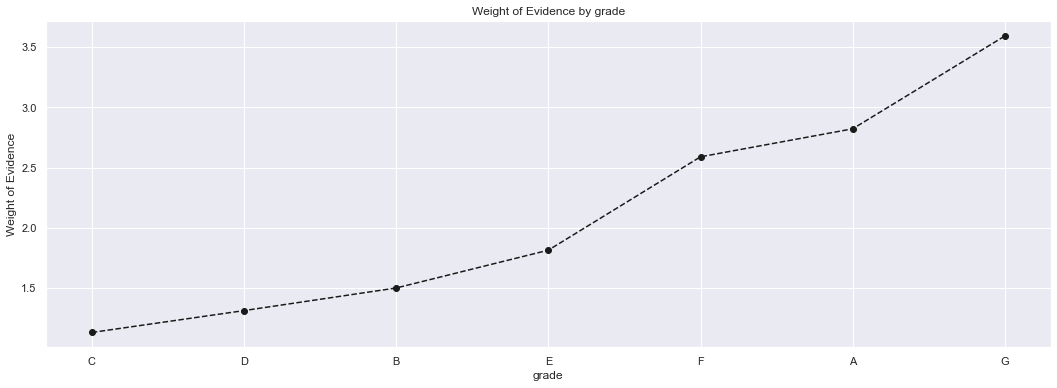

In [157]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [158]:
# Preprocessing the homeownership
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           RENT  37874   0.887944    0.406125  33630.0  4244.0     0.399264   
1       MORTGAGE  46919   0.915898    0.503115  42973.0  3946.0     0.510186   
2            OWN   8409   0.901891    0.090170   7584.0   825.0     0.090039   
3          OTHER     45   0.777778    0.000483     35.0    10.0     0.000416   
4           NONE     10   0.800000    0.000107      8.0     2.0     0.000095   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.470145  0.635868             NaN       NaN  0.000292  
1    0.437133  0.739667        0.027953  0.103799  0.000292  
2    0.091392  2.289330        0.014007  1.549663  0.000292  
3    0.001108  6.554076        0.124113  4.264746  0.000292  
4    0.000222  8.191685        0.022222  1.637609  0.000292

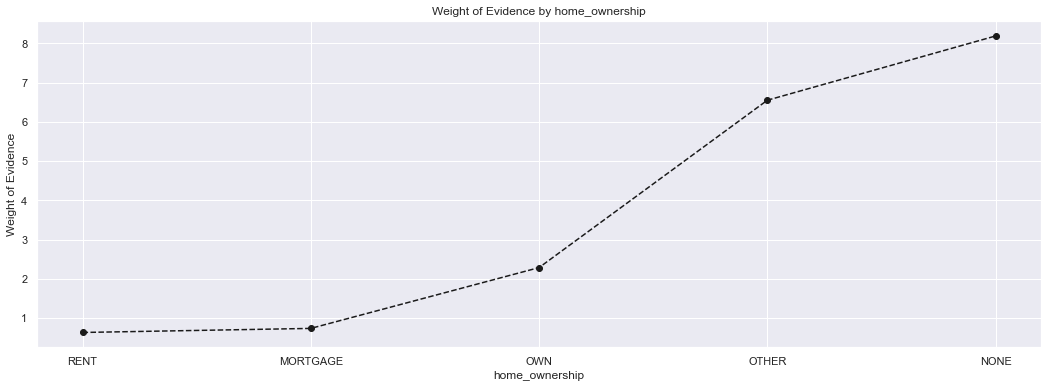

In [159]:
plot_by_woe(df_temp)

In [160]:
# Create dummy variables for home ownwership
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

In [161]:
# Create dummy variables for the states
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp.sort_values(by = 'n_obs', ascending = True)

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   
47         NE      1   1.000000    0.000011      1.0     0.0     0.000012   
46         ID      2   0.500000    0.000021      1.0     1.0     0.000012   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
43         VT    178   0.921348    0.001909    164.0    14.0     0.001947   
42         SD    179   0.910615    0.001919    163.0    16.0     0.001935   
38         DE    208   0.884615    0.002230    184.0    24.0     0.002184   
44         WY    209   0.933014    0.002241    195.0    14.0     0.002315   
39         MS    246   0.922764    0.002638    227.0    19.0     0.002695   
40         AK    248   0.927419    0.002659    230.0    18.0     0.002731   
45         MT    293   0.952218    0.003142    279.0    14.0     0.003312   
41         DC    297   0.939394    0.003185    279.0    18.0     0.003312   
36         NH    402   0.905473    0.004311    364.0    38.0     0.004322   
35         RI    403   0.895782    0.004321    361.0    42.0     0.004286   
33         HI    486   0.882716    0.005211    429.0    57.0     0.005093   
37         WV    486   0.927984    0.005211    451.0    35.0     0.005354   
34         NM    513   0.912281    0.005501    468.0    45.0     0.005556   
31         UT    672   0.909226    0.007206    611.0    61.0     0.007254   
29         AR    728   0.899725    0.007806    655.0    73.0     0.007776   
32         KS    830   0.926506    0.008900    769.0    61.0     0.009130   
28         OK    833   0.906363    0.008932    755.0    78.0     0.008964   
30         KY    851   0.916569    0.009125    780.0    71.0     0.009260   
21         LA   1130   0.885841    0.012117   1001.0   129.0     0.011884   
26         SC   1135   0.920705    0.012171   1045.0    90.0     0.012407   
25         OR   1135   0.912775    0.012171   1036.0    99.0     0.012300   
27         TN   1139   0.920983    0.012214   1049.0    90.0     0.012454   
24         WI   1171   0.909479    0.012557   1065.0   106.0     0.012644   
20         AL   1182   0.884095    0.012675   1045.0   137.0     0.012407   
16         NV   1298   0.875963    0.013919   1137.0   161.0     0.013499   
22         IN   1315   0.905703    0.014101   1191.0   124.0     0.014140   
23         CT   1429   0.920924    0.015323   1316.0   113.0     0.015624   
18         MO   1491   0.896714    0.015988   1337.0   154.0     0.015873   
19         MN   1632   0.911765    0.017500   1488.0   144.0     0.017666   
17         CO   1916   0.916493    0.020545   1756.0   160.0     0.020848   
15         AZ   2067   0.899855    0.022165   1860.0   207.0     0.022082   
14         WA   2145   0.902098    0.023001   1935.0   210.0     0.022973   
12         MD   2203   0.897413    0.023623   1977.0   226.0     0.023471   
13         MA   2214   0.904697    0.023741   2003.0   211.0     0.023780   
11         MI   2358   0.896098    0.025285   2113.0   245.0     0.025086   
9          NC   2478   0.898709    0.026572   2227.0   251.0     0.026440   
10         VA   2856   0.911415    0.030625   2603.0   253.0     0.030903   
8          GA   3015   0.909453    0.032330   2742.0   273.0     0.032554   
7          OH   3102   0.906512    0.033263   2812.0   290.0     0.033385   
5          PA   3334   0.898920    0.035751   2997.0   337.0     0.035581   
4          NJ   3676   0.884657    0.039418   3252.0   424.0     0.038609   
6          IL   3779   0.919820    0.040522   3476.0   303.0     0.041268   
2          FL   6426   0.883598    0.068906   5678.0   748.0     0.067411   
3          TX   7281   0.918006    0.078075   6684.0   597.0     0.079354   
1          NY   8031   0.894658    0.086117   7185.0   846.0     0.085302   
0          CA  14251   0.901761    0.152814  12851.0  1400.0     0.152570   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
49    0.000000   

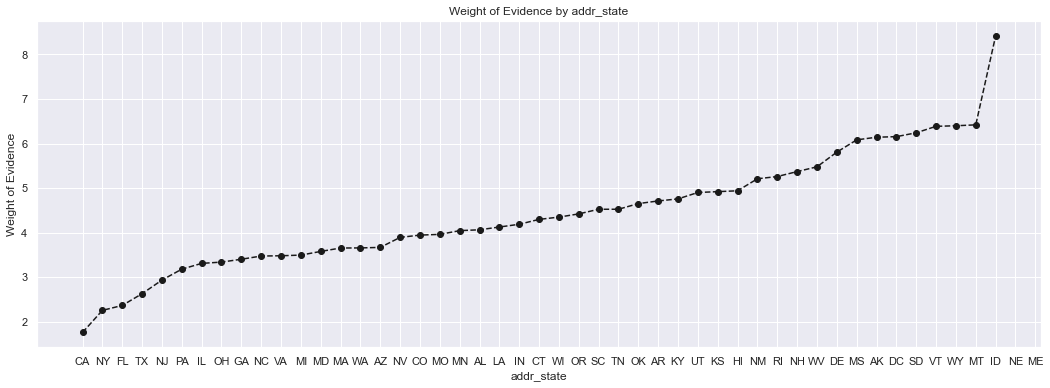

In [162]:
plot_by_woe(df_temp)

In [163]:
# Create n_obs for ND as ND is missing in the list
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

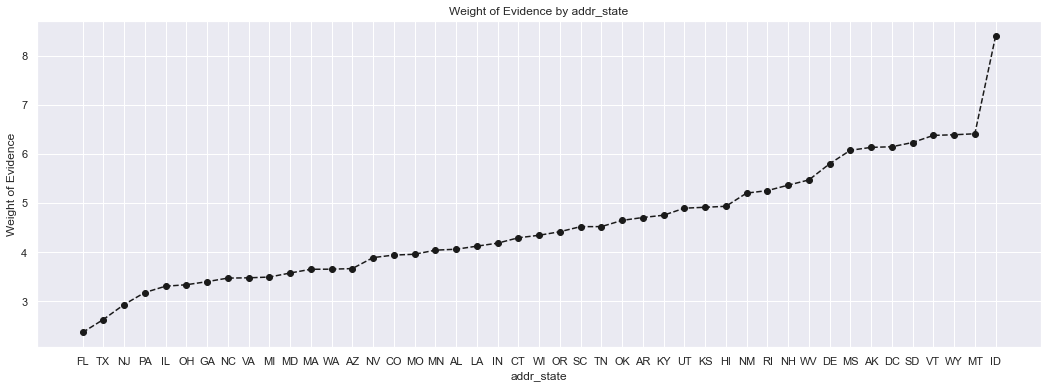

In [164]:
plot_by_woe(df_temp.iloc[2: -3, :])

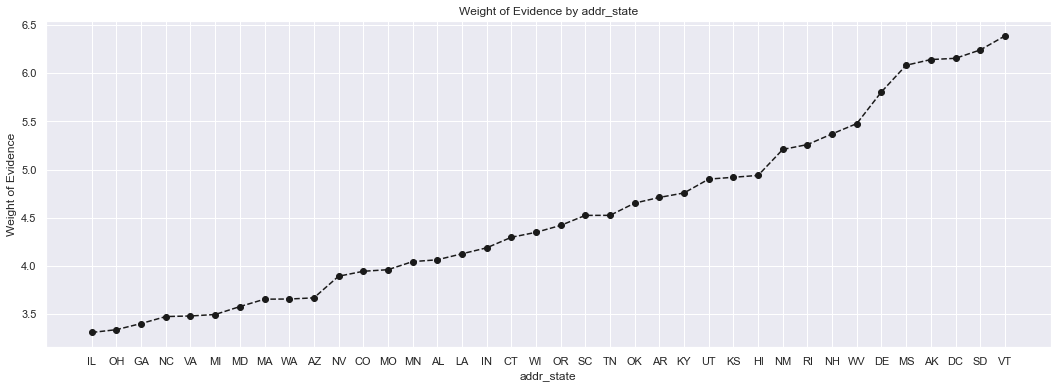

In [165]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [166]:
# Create dummy variables for the states by categorizing them according to their n_obs
df_inputs_prepr['add_state:FL_TX_NJ_PA_IL_VA_OH_GA_VA_NC'] = sum([df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:TX'],
                                                                 df_inputs_prepr['addr_state:NJ'], df_inputs_prepr['addr_state:PA'],
                                                                 df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:VA'],
                                                                 df_inputs_prepr['addr_state:OH'],
                                                                 df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:VA'],
                                                                 df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:MI_MA_MD_AZ_WA_CO_MN_MO'] = sum([df_inputs_prepr['addr_state:MI'], df_inputs_prepr['addr_state:MA'],
                                                            df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:AZ'],
                                                            df_inputs_prepr['addr_state:WA'], df_inputs_prepr['addr_state:CO']])

df_inputs_prepr['addr_state:MN_MO'] = sum([df_inputs_prepr['addr_state:MN'], df_inputs_prepr['addr_state:MO']])

df_inputs_prepr['addr_state:CT_NV_IN_TN'] = sum([df_inputs_prepr['addr_state:CT'], df_inputs_prepr['addr_state:NV'],
                                                df_inputs_prepr['addr_state:IN'], df_inputs_prepr['addr_state:TN']])

df_inputs_prepr['addr_state:OR_WI_AL'] = sum([df_inputs_prepr['addr_state:OR'], df_inputs_prepr['addr_state:WI'],
                                              df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:AK_DE_MT_DC'] = sum([df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:DE'],
                                                df_inputs_prepr['addr_state:MT'], df_inputs_prepr['addr_state:DC']])

df_inputs_prepr['addr_state:RI_NH_WV'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:NH'],
                                             df_inputs_prepr['addr_state:WV']])

df_inputs_prepr['addr_state:ID_ME_ND_NE_IA_VT_SD_WY_MS'] = sum([df_inputs_prepr['addr_state:ID'],df_inputs_prepr['addr_state:ME'],
                                                               df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                               df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:VT'],
                                                               df_inputs_prepr['addr_state:SD'], df_inputs_prepr['addr_state:WY'],
                                                               df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:SC_LA_KY_KS_OK'] = sum([df_inputs_prepr['addr_state:SC'], df_inputs_prepr['addr_state:LA'],
                                                df_inputs_prepr['addr_state:KY'], df_inputs_prepr['addr_state:KS'],
                                                df_inputs_prepr['addr_state:OK']])

df_inputs_prepr['addr_state:AR_UT_NM_HI'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:UT'],
                                                df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:HI']])

df_inputs_prepr['addr_state:NY'] = df_inputs_prepr['addr_state:NY']

df_inputs_prepr['addr_state:CA'] = df_inputs_prepr['addr_state:CA']

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [167]:
# Verification Status
df_temp2 = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp2

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.885616    0.360734  29793.0  3848.0   
1     Source Verified  29963   0.910990    0.321295  27296.0  2667.0   
2        Not Verified  29653   0.915287    0.317971  27141.0  2512.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353710    0.426277  0.731194             NaN       NaN  0.031491  
1     0.324065    0.295447  1.126043        0.025374  0.394848  0.031491  
2     0.322225    0.278276  1.190623        0.004297  0.064580  0.031491

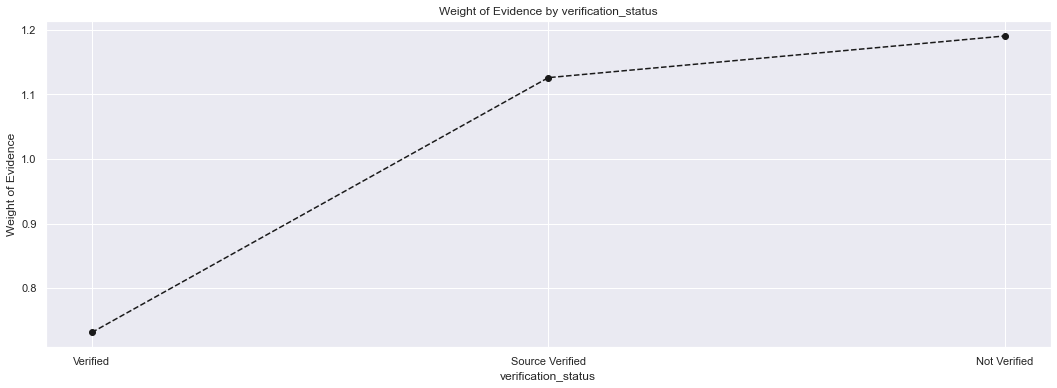

In [168]:
# Plot the dataframe results of verification status
plot_by_woe(df_temp2)

In [169]:
# Dummy variables for the verification status
df_inputs_prepr['verification_status: VERIFIED_SOURCE_VER_NOT_VER_JOINT'] = sum([df_inputs_prepr['verification_status_joint'], df_inputs_prepr['verification_status:Not Verified'],
                                                                                df_inputs_prepr['verification_status:Source Verified'], df_inputs_prepr['verification_status:Verified']])

In [170]:
# Dummy variables for purpose
df_temp3 = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp3

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0   debt_consolidation  55012   0.899676    0.589897  49493.0  5519.0   
1          credit_card  20576   0.927343    0.220638  19081.0  1495.0   
2                other   4806   0.872243    0.051535   4192.0   614.0   
3     home_improvement   5299   0.917532    0.056821   4862.0   437.0   
4       small_business   1431   0.789658    0.015345   1130.0   301.0   
5       major_purchase   1991   0.910598    0.021350   1813.0   178.0   
6              medical    918   0.863834    0.009844    793.0   125.0   
7                  car   1072   0.925373    0.011495    992.0    80.0   
8               moving    602   0.885382    0.006455    533.0    69.0   
9                house    439   0.870159    0.004707    382.0    57.0   
10             wedding    456   0.875000    0.004890    399.0    57.0   
11            vacation    496   0.885081    0.005319    439.0    57.0   
12         educational     89   0.752809    0.000954     67.0    22.0   
13    renewable_energy     70   0.771429    0.000751     54.0    16.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0      0.587593    0.611388  0.386303             NaN       NaN -0.02886  
1      0.226534    0.165614  1.722662        0.027666  1.336358 -0.02886  
2      0.049768    0.068018  2.551293        0.055100  0.828632 -0.02886  
3      0.057723    0.048410  2.941974        0.045289  0.390681 -0.02886  
4      0.013416    0.033344  3.164709        0.127874  0.222735 -0.02886  
5      0.021524    0.019719  3.832538        0.120940  0.667828 -0.02886  
6      0.009415    0.013847  4.133287        0.046763  0.300750 -0.02886  
7      0.011777    0.008862  4.648390        0.061539  0.515103 -0.02886  
8      0.006328    0.007644  4.752133        0.039991  0.103742 -0.02886  
9      0.004535    0.006314  4.925845        0.015223  0.173712 -0.02886  
10     0.004737    0.006314  4.931393        0.004841  0.005547 -0.02886  
11     0.005212    0.006314  4.942848        0.010081  0.011455 -0.02886  
12     0.000795    0.002437  5.732989        0.132272  0.790142 -0.02886  
13     0.000641    0.001772  6.075875        0.018620  0.342886 -0.02886

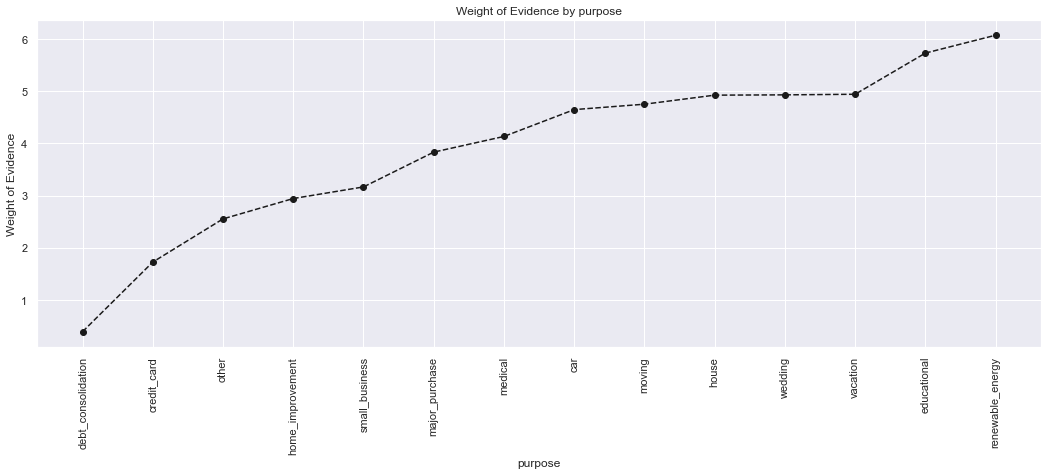

In [171]:
# Plot dataframe results of the purpose
plot_by_woe(df_temp3, 90)

In [172]:
# Create Dummy Variables for Purpose
df_inputs_prepr['purpose:DEBT_CONSOLIDATION_CREDIT_CARD'] = sum([df_inputs_prepr['purpose:debt_consolidation'], df_inputs_prepr['purpose:credit_card']])

df_inputs_prepr['purpose:OTHER_HOME_IMPROVEMENT'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:home_improvement']])

df_inputs_prepr['purpose:SMALL_BIZ_MAJ_PURCHASE_MEDICAL_MOVING_CAR_HOUSE_WEDDING_VACATION'] = sum([df_inputs_prepr['purpose:small_business'], df_inputs_prepr['purpose:major_purchase'],
                                                                                                  df_inputs_prepr['purpose:medical'], df_inputs_prepr['purpose:moving'],
                                                                                                  df_inputs_prepr['purpose:car'], df_inputs_prepr['purpose:house'], 
                                                                                                  df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:EDUCATIONAL_REN_ENERGY'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:renewable_energy']])

In [173]:
# Dummy variables for 'initial_list_status'
df_temp4 = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp4

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.890992    0.648648  53897.0  6594.0   
1                   w  32766   0.925746    0.351352  30333.0  2433.0   

   prop_n_good  prop_n_bad      WoE  diff_prop_good  diff_WoE        IV  
0     0.639879    0.730475  0.19864             NaN       NaN  0.093794  
1     0.360121    0.269525  1.23394        0.034754    1.0353  0.093794

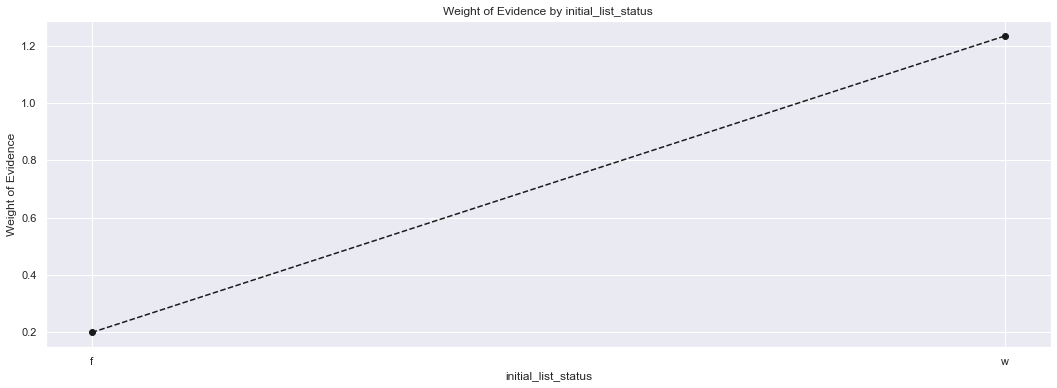

In [174]:
# Plot dataframe results
plot_by_woe(df_temp4)

In [175]:
# Create the dummy variables for 'initial_list_status'
df_inputs_prepr['initial_list_status:F_W'] = sum([df_inputs_prepr['initial_list_status:f'], df_inputs_prepr['initial_list_status:w']])

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [176]:
# Create a function for automatic pre-processing of discrete variables
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    
    # Calc the proportion of observations in each grade
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculate the number of good borrowers and bad borrowers by grade group
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    
    # Calculate the proportion of good borrowers and bad borrowers for each grade
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    
    # Calculate the Weight of Evidence
    df['WoE'] = np.log(df['prop_good'] / df['prop_n_bad'])
    
    # Sort results by weight of evidence and reset the index
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop = True)
    
    # Calculate the difference of each two subsequent rows
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculate the Information Value
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocesing Continuous Variables: Creating Dummy Variables, Part 1

In [177]:
# Check the Term variable
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [178]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.912711    0.724171  61639.0  5895.0     0.731794   
1        60  25723   0.878241    0.275829  22591.0  3132.0     0.268206   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.653041  0.334779             NaN       NaN -0.046774  
1    0.346959  0.928714        0.034469  0.593935 -0.046774

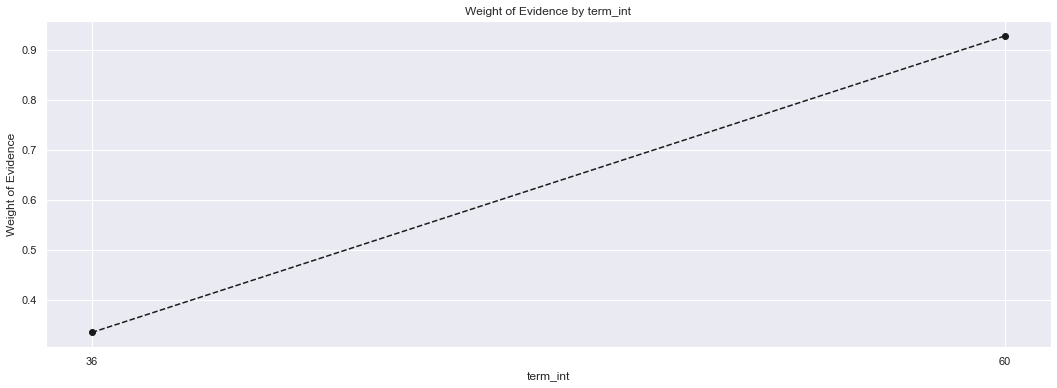

In [179]:
# Visualize the results
plot_by_woe(df_temp)

In [180]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [181]:
# Employment length
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [182]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  11553   0.889726    0.123883  10279.0  1274.0   
1              1.0   5968   0.905664    0.063995   5405.0   563.0   
2              2.0   8295   0.900422    0.088948   7469.0   826.0   
3              3.0   7391   0.900961    0.079254   6659.0   732.0   
4              4.0   5555   0.903510    0.059567   5019.0   536.0   
5              5.0   6172   0.896792    0.066183   5535.0   637.0   
6              6.0   5225   0.891675    0.056028   4659.0   566.0   
7              7.0   5131   0.903333    0.055020   4635.0   496.0   
8              8.0   4542   0.902026    0.048704   4097.0   445.0   
9              9.0   3621   0.902513    0.038828   3268.0   353.0   
10            10.0  29804   0.912797    0.319590  27205.0  2599.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.122035    0.141132  1.841216             NaN       NaN -0.035262  
1      0.064170    0.062368  2.675608        0.015938  0.834392 -0.035262  
2      0.088674    0.091503  2.286489        0.005242  0.389120 -0.035262  
3      0.079057    0.081090  2.407901        0.000539  0.121412 -0.035262  
4      0.059587    0.059377  2.722373        0.002550  0.314472 -0.035262  
5      0.065713    0.070566  2.542274        0.006718  0.180099 -0.035262  
6      0.055313    0.062701  2.654727        0.005117  0.112453 -0.035262  
7      0.055028    0.054946  2.799735        0.011658  0.145008 -0.035262  
8      0.048641    0.049297  2.906789        0.001307  0.107054 -0.035262  
9      0.038799    0.039105  3.138935        0.000488  0.232147 -0.035262  
10     0.322985    0.287914  1.153851        0.010284  1.985084 -0.035262

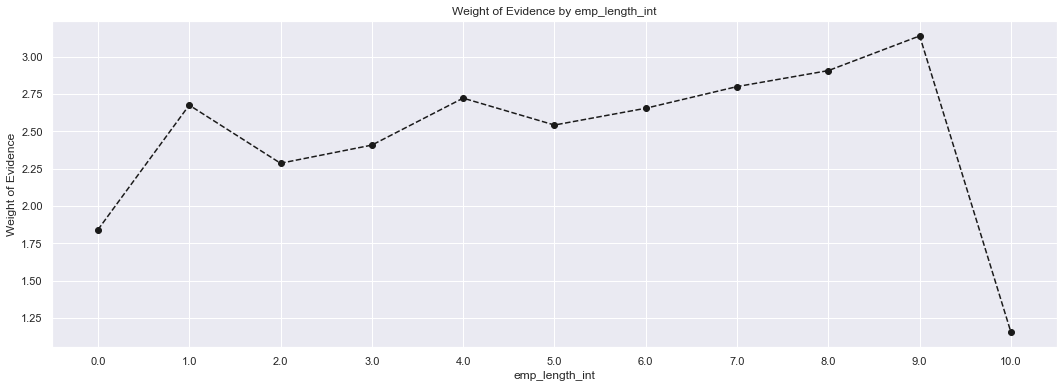

In [183]:
# Visalize the results of employment length
plot_by_woe(df_temp)

In [184]:
# Creating dummy variables for the 'emp_length'
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [185]:
# Explore 'mths_since_issue_date'
df_inputs_prepr['mths_since_issue_date'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [186]:
# Create new variable called 'mths_since_issue_d_factor'
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_date'], 50)

In [187]:
df_inputs_prepr['mths_since_issue_d_factor']

362514      (39.6, 41.4]
288564      (37.8, 39.6]
213591      (64.8, 66.6]
263083     (35.91, 37.8]
165001      (57.6, 59.4]
82511       (48.6, 50.4]
24671       (84.6, 86.4]
97373       (50.4, 52.2]
44058       (46.8, 48.6]
351326      (39.6, 41.4]
176798      (57.6, 59.4]
2253        (70.2, 72.0]
11493       (75.6, 77.4]
247866     (35.91, 37.8]
465694      (46.8, 48.6]
440413      (45.0, 46.8]
340144      (39.6, 41.4]
145732      (55.8, 57.6]
171649      (57.6, 59.4]
135808      (54.0, 55.8]
42139     (118.8, 120.6]
196634      (61.2, 63.0]
41142     (100.8, 102.6]
310417      (37.8, 39.6]
274665      (37.8, 39.6]
269466      (37.8, 39.6]
1554        (70.2, 72.0]
455384      (46.8, 48.6]
121647      (52.2, 54.0]
261521     (35.91, 37.8]
259632     (35.91, 37.8]
115179      (52.2, 54.0]
93531       (50.4, 52.2]
93946       (50.4, 52.2]
278174      (37.8, 39.6]
314251      (37.8, 39.6]
317118      (39.6, 41.4]
106698      (50.4, 52.2]
390216      (41.4, 43.2]
396449      (41.4, 43.2]


In [188]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (35.91, 37.8]   7191   0.960645    0.077109  6908.0  283.0   
1               (37.8, 39.6]   9752   0.948113    0.104571  9246.0  506.0   
2               (39.6, 41.4]   9506   0.935199    0.101933  8890.0  616.0   
3               (41.4, 43.2]   7240   0.928591    0.077635  6723.0  517.0   
4               (43.2, 45.0]   7217   0.919219    0.077388  6634.0  583.0   
5               (45.0, 46.8]   3104   0.909472    0.033284  2823.0  281.0   
6               (46.8, 48.6]   6197   0.907859    0.066451  5626.0  571.0   
7               (48.6, 50.4]   5821   0.903625    0.062419  5260.0  561.0   
8               (50.4, 52.2]   5021   0.890460    0.053840  4471.0  550.0   
9               (52.2, 54.0]   4497   0.880142    0.048222  3958.0  539.0   
10              (54.0, 55.8]   2064   0.877907    0.022132  1812.0  252.0   
11              (55.8, 57.6]   3572   0.870381    0.038303  3109.0  463.0   
12              (57.6, 59.4]   2904   0.859504    0.031140  2496.0  408.0   
13              (59.4, 61.2]   2474   0.857720    0.026529  2122.0  352.0   
14              (61.2, 63.0]   2539   0.855849    0.027226  2173.0  366.0   
15              (63.0, 64.8]   1115   0.841256    0.011956   938.0  177.0   
16              (64.8, 66.6]   1721   0.819872    0.018454  1411.0  310.0   
17              (66.6, 68.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (68.4, 70.2]   1097   0.840474    0.011763   922.0  175.0   
19              (70.2, 72.0]   1001   0.818182    0.010734   819.0  182.0   
20              (72.0, 73.8]    447   0.834452    0.004793   373.0   74.0   
21              (73.8, 75.6]    790   0.853165    0.008471   674.0  116.0   
22              (75.6, 77.4]    754   0.874005    0.008085   659.0   95.0   
23              (77.4, 79.2]    690   0.846377    0.007399   584.0  106.0   
24              (79.2, 81.0]    599   0.876461    0.006423   525.0   74.0   
25              (81.0, 82.8]    254   0.870079    0.002724   221.0   33.0   
26              (82.8, 84.6]    533   0.878049    0.005715   468.0   65.0   
27              (84.6, 86.4]    459   0.838780    0.004922   385.0   74.0   
28              (86.4, 88.2]    443   0.866817    0.004750   384.0   59.0   
29              (88.2, 90.0]    439   0.863326    0.004707   379.0   60.0   
30              (90.0, 91.8]    194   0.835052    0.002080   162.0   32.0   
31              (91.8, 93.6]    367   0.896458    0.003935   329.0   38.0   
32              (93.6, 95.4]    257   0.879377    0.002756   226.0   31.0   
33              (95.4, 97.2]    276   0.836957    0.002960   231.0   45.0   
34              (97.2, 99.0]    234   0.829060    0.002509   194.0   40.0   
35             (99.0, 100.8]    100   0.920000    0.001072    92.0    8.0   
36            (100.8, 102.6]    170   0.835294    0.001823   142.0   28.0   
37            (102.6, 104.4]    150   0.873333    0.001608   131.0   19.0   
38            (104.4, 106.2]    129   0.868217    0.001383   112.0   17.0   
39            (106.2, 108.0]    119   0.815126    0.001276    97.0   22.0   
40            (108.0, 109.8]     36   0.861111    0.000386    31.0    5.0   
41            (109.8, 111.6]     40   0.800000    0.000429    32.0    8.0   
42            (111.6, 113.4]     37   0.972973    0.000397    36.0    1.0   
43            (113.4, 115.2]     57   0.824561    0.000611    47.0   10.0   
44            (115.2, 117.0]    131   0.801527    0.001405   105.0   26.0   
45            (117.0, 118.8]     59   0.813559    0.000633    48.0   11.0   
46            (118.8, 120.6]     83   0.734940    0.000890    61.0   22.0   
47            (120.6, 122.4]     41   0.609756    0.000440    25.0   16.0   
48            (122.4, 124.2]     23   0.695652    0.000247    16.0    7.0   
49            (124.2, 126.0]     17   0.882353    0.000182    15.0    2.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  

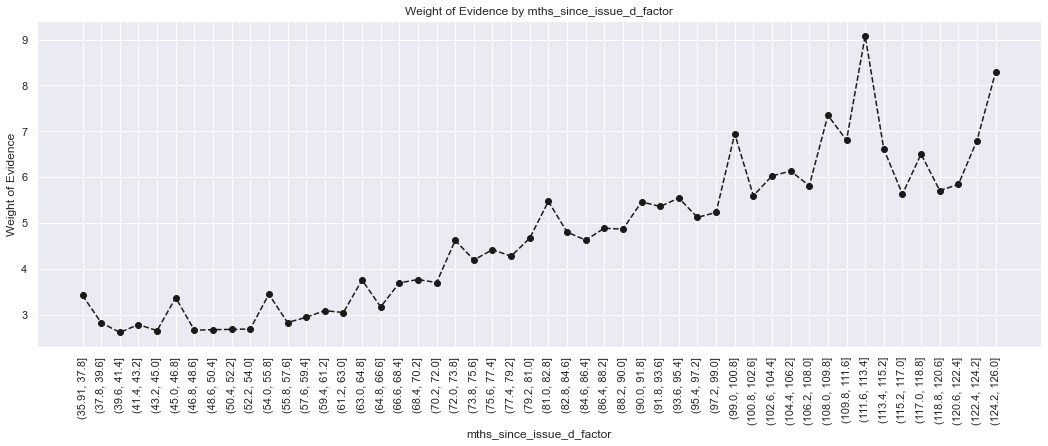

In [189]:
plot_by_woe(df_temp, 90)

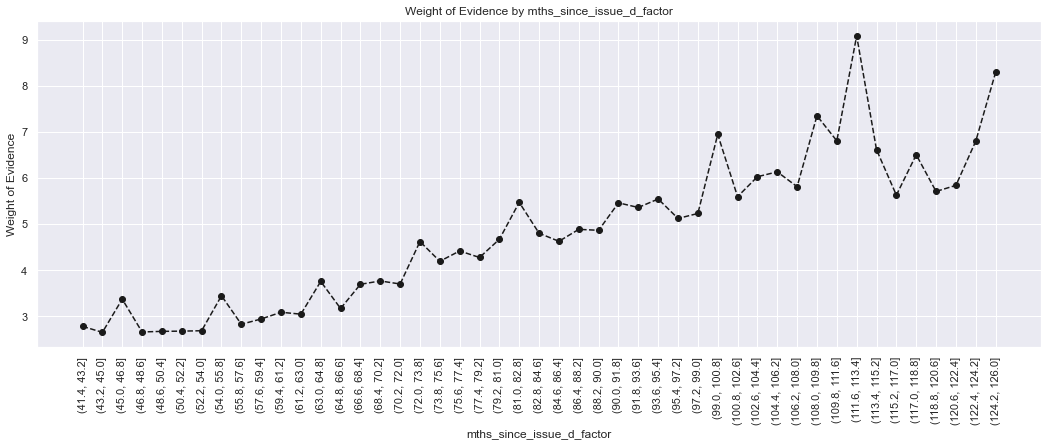

In [190]:
plot_by_woe(df_temp.iloc[3:, :], 90)

In [191]:
# Fine classing for 'mths_since_issue_date'
df_inputs_prepr['mths_since_issue_date:<38'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_date:38-39'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(38,40)), 1, 0)
df_inputs_prepr['mths_since_issue_date:40-41'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(40,42)), 1, 0)
df_inputs_prepr['mths_since_issue_date:42-48'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(42,49)), 1, 0)
df_inputs_prepr['mths_since_issue_date:49-52'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(49,53)), 1, 0)
df_inputs_prepr['mths_since_issue_date:53-64'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(53,65)), 1, 0)
df_inputs_prepr['mths_since_issue_date:65-84'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(65,85)), 1, 0)
df_inputs_prepr['mths_since_issue_date:<84'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(84)), 1, 0)

In [192]:
# Fine class the interest rate variable (int_rate_factor)
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [193]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.980345    0.022368  2045.0   41.0   
2     (6.246, 6.658]   1974   0.975177    0.021167  1925.0   49.0   
3     (6.658, 7.071]    477   0.949686    0.005115   453.0   24.0   
4     (7.071, 7.484]    804   0.983831    0.008621   791.0   13.0   
5     (7.484, 7.897]   3245   0.968259    0.034796  3142.0  103.0   
6      (7.897, 8.31]   2429   0.955537    0.026046  2321.0  108.0   
7      (8.31, 8.722]   1680   0.970833    0.018015  1631.0   49.0   
8     (8.722, 9.135]   2384   0.947567    0.025564  2259.0  125.0   
9     (9.135, 9.548]   1590   0.983648    0.017050  1564.0   26.0   
10    (9.548, 9.961]   1881   0.933014    0.020170  1755.0  126.0   
11   (9.961, 10.374]   2766   0.943601    0.029660  2610.0  156.0   
12  (10.374, 10.786]   1390   0.923741    0.014905  1284.0  106.0   
13  (10.786, 11.199]   4464   0.947357    0.047868  4229.0  235.0   
14  (11.199, 11.612]   1213   0.922506    0.013007  1119.0   94.0   
15  (11.612, 12.025]   3737   0.942467    0.040072  3522.0  215.0   
16  (12.025, 12.438]   3077   0.909327    0.032995  2798.0  279.0   
17   (12.438, 12.85]   2754   0.932825    0.029531  2569.0  185.0   
18   (12.85, 13.263]   5440   0.913971    0.058333  4972.0  468.0   
19  (13.263, 13.676]   3806   0.913032    0.040812  3475.0  331.0   
20  (13.676, 14.089]   2692   0.907875    0.028866  2444.0  248.0   
21  (14.089, 14.502]   5760   0.898090    0.061765  5173.0  587.0   
22  (14.502, 14.914]   1187   0.877843    0.012728  1042.0  145.0   
23  (14.914, 15.327]   4811   0.892954    0.051589  4296.0  515.0   
24   (15.327, 15.74]   3146   0.907184    0.033735  2854.0  292.0   
25   (15.74, 16.153]   1869   0.846442    0.020041  1582.0  287.0   
26  (16.153, 16.566]   3230   0.868111    0.034635  2804.0  426.0   
27  (16.566, 16.978]   1035   0.868599    0.011098   899.0  136.0   
28  (16.978, 17.391]   2843   0.873373    0.030486  2483.0  360.0   
29  (17.391, 17.804]   2992   0.852607    0.032083  2551.0  441.0   
30  (17.804, 18.217]    286   0.849650    0.003067   243.0   43.0   
31   (18.217, 18.63]   2729   0.847930    0.029263  2314.0  415.0   
32   (18.63, 19.042]   1835   0.840872    0.019677  1543.0  292.0   
33  (19.042, 19.455]   1135   0.811454    0.012171   921.0  214.0   
34  (19.455, 19.868]   1680   0.845238    0.018015  1420.0  260.0   
35  (19.868, 20.281]   1244   0.872186    0.013339  1085.0  159.0   
36  (20.281, 20.694]    805   0.827329    0.008632   666.0  139.0   
37  (20.694, 21.106]    956   0.813808    0.010251   778.0  178.0   
38  (21.106, 21.519]    701   0.774608    0.007517   543.0  158.0   
39  (21.519, 21.932]    222   0.792793    0.002381   176.0   46.0   
40  (21.932, 22.345]    832   0.802885    0.008922   668.0  164.0   
41  (22.345, 22.758]    586   0.776451    0.006284   455.0  131.0   
42   (22.758, 23.17]    375   0.762667    0.004021   286.0   89.0   
43   (23.17, 23.583]    655   0.804580    0.007024   527.0  128.0   
44  (23.583, 23.996]    408   0.762255    0.004375   311.0   97.0   
45  (23.996, 24.409]    393   0.867684    0.004214   341.0   52.0   
46  (24.409, 24.822]    436   0.814220    0.004675   355.0   81.0   
47  (24.822, 25.234]    351   0.831909    0.003764   292.0   59.0   
48  (25.234, 25.647]    194   0.793814    0.002080   154.0   40.0   
49   (25.647, 26.06]    474   0.776371    0.005083   368.0  106.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE      IV  
0      0.002279    0.000665  7.285444             NaN       NaN  0.2141  
1      0.024279    0.004542  5.374553        0.010648  1.910892  0.2141  
2      0.022854    0.005428  5.191019        0.005168  0.183534  0.2141  
3      0.005378    0.002659  5.878297        0.025492  0.687278  0.2141  
4      0.009391    0.001440  6.526725        0.034145  0.648428  0.2141  
5      0.037303    0.011410  4.440991    

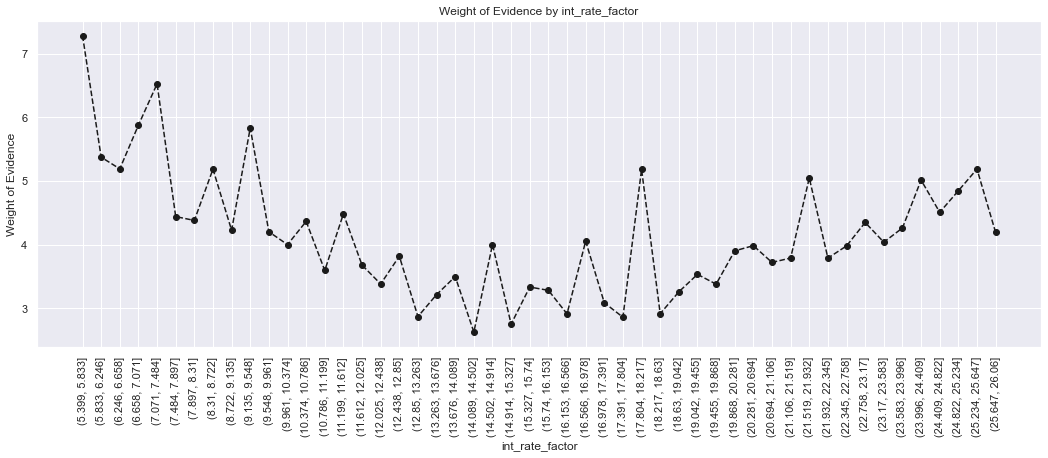

In [194]:
plot_by_woe(df_temp, 90)

In [195]:
# Fine classing for 'int_rate_factor'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:<20.281'] = np.where((df_inputs_prepr['int_rate'] <= 20.281), 1, 0)

In [196]:
# Fine classing for the 'funded_amnt'
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.887147    0.003421   283.0   36.0   
1     (1190.0, 1880.0]    800   0.897500    0.008578   718.0   82.0   
2     (1880.0, 2570.0]   1513   0.908130    0.016224  1374.0  139.0   
3     (2570.0, 3260.0]   1817   0.900385    0.019484  1636.0  181.0   
4     (3260.0, 3950.0]   1245   0.907631    0.013350  1130.0  115.0   
5     (3950.0, 4640.0]   2298   0.893386    0.024642  2053.0  245.0   
6     (4640.0, 5330.0]   3957   0.906242    0.042431  3586.0  371.0   
7     (5330.0, 6020.0]   4186   0.915671    0.044887  3833.0  353.0   
8     (6020.0, 6710.0]   1718   0.891735    0.018422  1532.0  186.0   
9     (6710.0, 7400.0]   2880   0.906597    0.030882  2611.0  269.0   
10    (7400.0, 8090.0]   4266   0.906001    0.045745  3865.0  401.0   
11    (8090.0, 8780.0]   1617   0.897959    0.017339  1452.0  165.0   
12    (8780.0, 9470.0]   2320   0.898707    0.024877  2085.0  235.0   
13   (9470.0, 10160.0]   8552   0.903999    0.091704  7731.0  821.0   
14  (10160.0, 10850.0]   1642   0.889769    0.017607  1461.0  181.0   
15  (10850.0, 11540.0]   2091   0.897178    0.022422  1876.0  215.0   
16  (11540.0, 12230.0]   5767   0.916594    0.061840  5286.0  481.0   
17  (12230.0, 12920.0]   1228   0.887622    0.013168  1090.0  138.0   
18  (12920.0, 13610.0]   1860   0.911828    0.019945  1696.0  164.0   
19  (13610.0, 14300.0]   2087   0.910398    0.022379  1900.0  187.0   
20  (14300.0, 14990.0]   1255   0.907570    0.013457  1139.0  116.0   
21  (14990.0, 15680.0]   5441   0.914538    0.058344  4976.0  465.0   
22  (15680.0, 16370.0]   2920   0.900342    0.031311  2629.0  291.0   
23  (16370.0, 17060.0]   1625   0.896615    0.017425  1457.0  168.0   
24  (17060.0, 17750.0]    921   0.863192    0.009876   795.0  126.0   
25  (17750.0, 18440.0]   2898   0.897170    0.031075  2600.0  298.0   
26  (18440.0, 19130.0]    989   0.871587    0.010605   862.0  127.0   
27  (19130.0, 19820.0]   1057   0.891202    0.011334   942.0  115.0   
28  (19820.0, 20510.0]   5055   0.909792    0.054205  4599.0  456.0   
29  (20510.0, 21200.0]   1635   0.909480    0.017532  1487.0  148.0   
30  (21200.0, 21890.0]    476   0.859244    0.005104   409.0   67.0   
31  (21890.0, 22580.0]   1028   0.896887    0.011023   922.0  106.0   
32  (22580.0, 23270.0]    633   0.903633    0.006788   572.0   61.0   
33  (23270.0, 23960.0]    497   0.853119    0.005329   424.0   73.0   
34  (23960.0, 24650.0]   2491   0.913689    0.026711  2276.0  215.0   
35  (24650.0, 25340.0]   2500   0.913600    0.026808  2284.0  216.0   
36  (25340.0, 26030.0]    487   0.872690    0.005222   425.0   62.0   
37  (26030.0, 26720.0]    299   0.839465    0.003206   251.0   48.0   
38  (26720.0, 27410.0]    410   0.887805    0.004396   364.0   46.0   
39  (27410.0, 28100.0]   1604   0.910848    0.017200  1461.0  143.0   
40  (28100.0, 28790.0]    204   0.877451    0.002188   179.0   25.0   
41  (28790.0, 29480.0]    286   0.849650    0.003067   243.0   43.0   
42  (29480.0, 30170.0]   1762   0.893871    0.018894  1575.0  187.0   
43  (30170.0, 30860.0]    133   0.842105    0.001426   112.0   21.0   
44  (30860.0, 31550.0]    218   0.844037    0.002338   184.0   34.0   
45  (31550.0, 32240.0]    367   0.937330    0.003935   344.0   23.0   
46  (32240.0, 32930.0]    139   0.920863    0.001491   128.0   11.0   
47  (32930.0, 33620.0]    275   0.909091    0.002949   250.0   25.0   
48  (33620.0, 34310.0]    142   0.908451    0.001523   129.0   13.0   
49  (34310.0, 35000.0]   3347   0.900508    0.035890  3014.0  333.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003360    0.003988  5.404712             NaN       NaN -0.044042  
1      0.008524    0.009084  4.593114        0.010353  0.811598 -0.044042  
2      0.016312    0.015398  4.077133        0.010630  0.515981 -0.044042  
3      0.019423    0.020051  3.804546        0.007744  0.272587 -0.044042  
4 

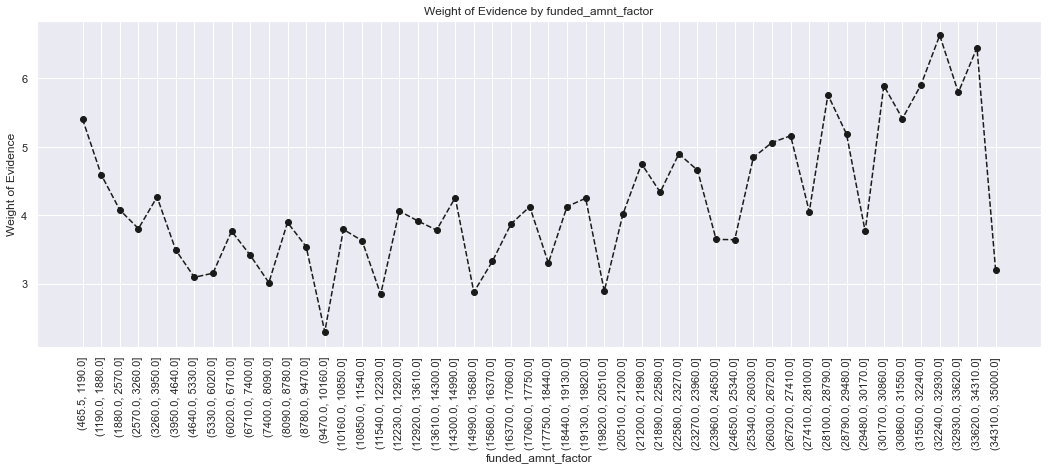

In [197]:
# Plot WOE by funded amount
plot_by_woe(df_temp, 90)

In [198]:
# Weight of Evidence for 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.587, 11.74]      5   1.000000    0.000054     5.0   
1                      (11.74, 23.48]      0        NaN    0.000000     NaN   
2                      (23.48, 35.22]      0        NaN    0.000000     NaN   
3                      (35.22, 46.96]      0        NaN    0.000000     NaN   
4                       (46.96, 58.7]      0        NaN    0.000000     NaN   
5                       (58.7, 70.44]      0        NaN    0.000000     NaN   
6                      (70.44, 82.18]    182   0.945055    0.001952   172.0   
7                      (82.18, 93.92]    508   0.927165    0.005447   471.0   
8                     (93.92, 105.66]    715   0.881119    0.007667   630.0   
9                     (105.66, 117.4]   1268   0.870662    0.013597  1104.0   
10                    (117.4, 129.14]   2314   0.890666    0.024813  2061.0   
11                   (129.14, 140.88]   2816   0.876420    0.030196  2468.0   
12                   (140.88, 152.62]   3366   0.895425    0.036094  3014.0   
13                   (152.62, 164.36]   3989   0.896716    0.042774  3577.0   
14                    (164.36, 176.1]   4857   0.897468    0.052082  4359.0   
15                    (176.1, 187.84]   5076   0.906028    0.054430  4599.0   
16                   (187.84, 199.58]   6578   0.898297    0.070536  5909.0   
17                   (199.58, 211.32]   7131   0.900435    0.076466  6421.0   
18                   (211.32, 223.06]   6775   0.895941    0.072649  6070.0   
19                    (223.06, 234.8]   5521   0.901286    0.059202  4976.0   
20                    (234.8, 246.54]   4966   0.897704    0.053251  4458.0   
21                   (246.54, 258.28]   4549   0.903715    0.048779  4111.0   
22                   (258.28, 270.02]   4472   0.904293    0.047954  4044.0   
23                   (270.02, 281.76]   3672   0.908497    0.039375  3336.0   
24                    (281.76, 293.5]   3640   0.909066    0.039032  3309.0   
25                    (293.5, 305.24]   2602   0.913912    0.027901  2378.0   
26                   (305.24, 316.98]   1988   0.915996    0.021317  1821.0   
27                   (316.98, 328.72]   2020   0.913861    0.021661  1846.0   
28                   (328.72, 340.46]   2129   0.912635    0.022829  1943.0   
29                    (340.46, 352.2]   1810   0.916022    0.019409  1658.0   
30                    (352.2, 363.94]   1477   0.924171    0.015838  1365.0   
31                   (363.94, 375.68]   1360   0.920588    0.014583  1252.0   
32                   (375.68, 387.42]   1152   0.919271    0.012353  1059.0   
33                   (387.42, 399.16]   1051   0.908658    0.011270   955.0   
34                    (399.16, 410.9]    826   0.927361    0.008857   766.0   
35                    (410.9, 422.64]    808   0.934406    0.008664   755.0   
36                   (422.64, 434.38]    524   0.908397    0.005619   476.0   
37                   (434.38, 446.12]    416   0.923077    0.004461   384.0   
38                   (446.12, 457.86]    329   0.920973    0.003528   303.0   
39                    (457.86, 469.6]    376   0.928191    0.004032   349.0   
40                    (469.6, 481.34]    371   0.929919    0.003978   345.0   
41                   (481.34, 493.08]    294   0.914966    0.003153   269.0   
42                   (493.08, 504.82]    229   0.947598    0.002456   217.0   
43                   (504.82, 516.56]    178   0.915730    0.001909   163.0   
44                    (516.56, 528.3]    159   0.937107    0.001705   149.0   
45                    (528.3, 540.04]    140   0.914286    0.001501   128.0   
46                   (540.04, 551.78]    135   0.903704    0.001448   122.0   
47                   (551.78, 563.52]     93   0.924731    0.000997    86.0   
48                   (563.52, 575.26]     80   0.900000    0.000858    72.0   
49                    (575.26, 587.0]    310   0.8870

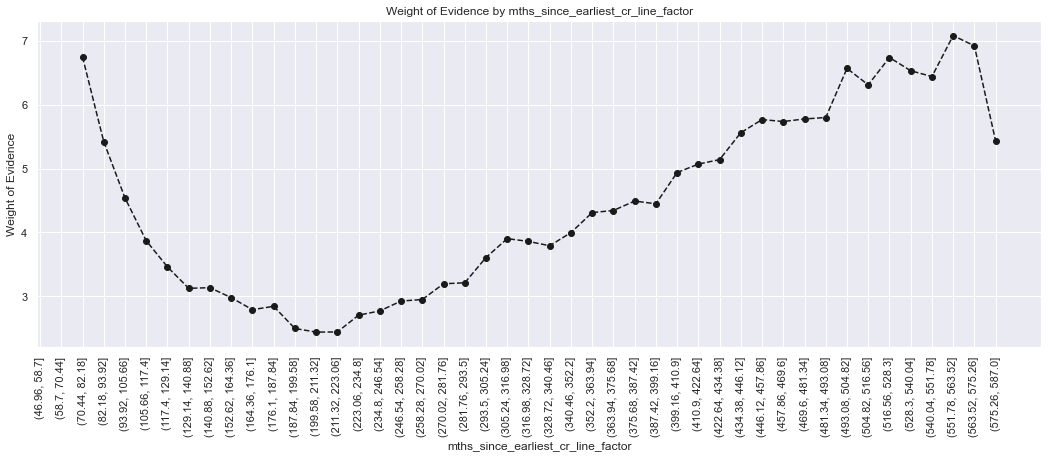

In [199]:
# Plot WOE for 'mths_since_earliest_cr_line'
plot_by_woe(df_temp, 90)

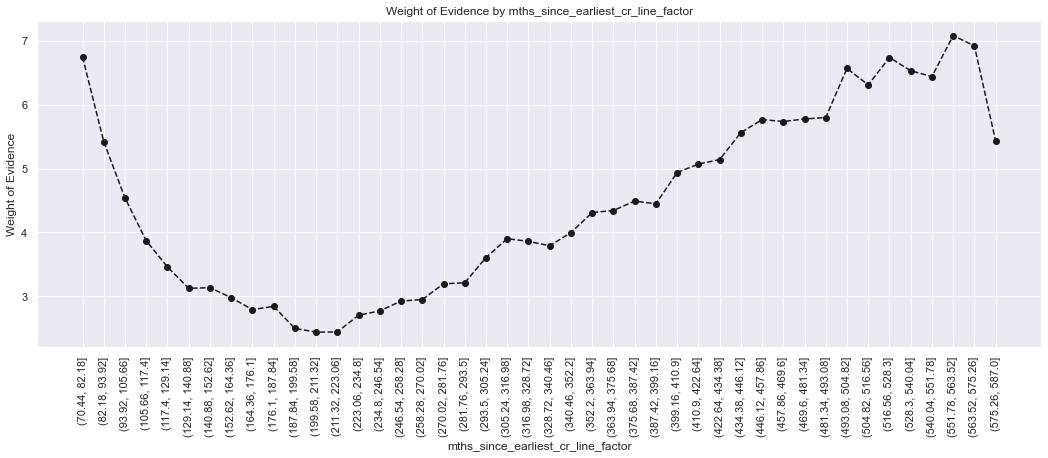

In [200]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [201]:
# Fine classing for 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [202]:
# Examine 'delinq_2yrs'
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [203]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.921627    0.517870  44510.0  3785.0   
1              1.0  25985   0.896363    0.278639  23292.0  2693.0   
2              2.0  11611   0.875205    0.124505  10162.0  1449.0   
3              3.0   5086   0.856272    0.054537   4355.0   731.0   
4              4.0   1431   0.856744    0.015345   1226.0   205.0   
5              5.0    551   0.843920    0.005908    465.0    86.0   
6              6.0    211   0.796209    0.002263    168.0    43.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528434    0.419298  0.787560             NaN       NaN  inf  
1      0.276529    0.298327  1.100155        0.025264  0.312595  inf  
2      0.120646    0.160518  1.696049        0.021159  0.595894  inf  
3      0.051704    0.080979  2.358395        0.018932  0.662346  inf  
4      0.014555    0.022710  3.630349        0.000471  1.271954  inf  
5      0.005521    0.009527  4.483931        0.012823  0.853582  inf  
6      0.001995    0.004763  5.118881        0.047712  0.634950  inf  
7      0.000226    0.001883  5.635682        0.268431  0.516801  inf  
8      0.000131    0.001108  6.158763        0.003968  0.523081  inf  
9      0.000036    0.000443  6.874383        0.095238  0.715620  inf  
10     0.000071    0.000111  8.953825        0.428571  2.079442  inf  
11     0.000083    0.000000       inf        0.142857       inf  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000000    0.000111      -inf        1.000000       inf  inf  
14     0.000000    0.000111      -inf        0.000000       NaN  inf  
15     0.000012    0.000111  8.414828        0.500000       inf  inf  
16     0.000012    0.000000       inf        0.500000       inf  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

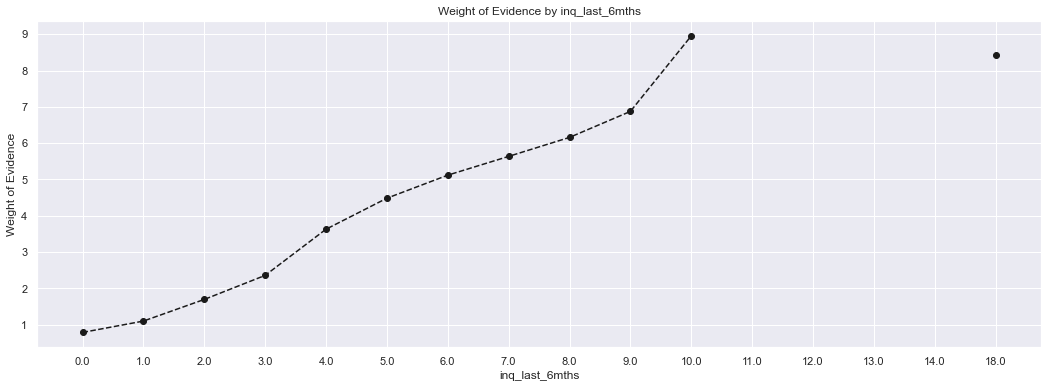

In [204]:
plot_by_woe(df_temp)

In [205]:
# Fine classing for 'inq_last_6mths'
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [206]:
# Examining 'open_acc'
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000083   
1        1.0     32   0.937500    0.000343    30.0    2.0     0.000356   
2        2.0    334   0.841317    0.003582   281.0   53.0     0.003336   
3        3.0   1122   0.861854    0.012031   967.0  155.0     0.011480   
4        4.0   2560   0.899219    0.027451  2302.0  258.0     0.027330   
5        5.0   4403   0.901431    0.047214  3969.0  434.0     0.047121   
6        6.0   6216   0.901062    0.066655  5601.0  615.0     0.066496   
7        7.0   7433   0.898830    0.079704  6681.0  752.0     0.079319   
8        8.0   8314   0.906062    0.089151  7533.0  781.0     0.089434   
9        9.0   8768   0.901688    0.094020  7906.0  862.0     0.093862   
10      10.0   8576   0.898554    0.091961  7706.0  870.0     0.091488   
11      11.0   7740   0.907106    0.082996  7021.0  719.0     0.083355   
12      12.0   6886   0.902411    0.073839  6214.0  672.0     0.073774   
13      13.0   5914   0.904295    0.063416  5348.0  566.0     0.063493   
14      14.0   4960   0.908669    0.053186  4507.0  453.0     0.053508   
15      15.0   4006   0.904893    0.042957  3625.0  381.0     0.043037   
16      16.0   3269   0.910370    0.035054  2976.0  293.0     0.035332   
17      17.0   2680   0.902612    0.028738  2419.0  261.0     0.028719   
18      18.0   2259   0.915007    0.024223  2067.0  192.0     0.024540   
19      19.0   1811   0.911651    0.019419  1651.0  160.0     0.019601   
20      20.0   1444   0.907895    0.015484  1311.0  133.0     0.015565   
21      21.0   1037   0.903568    0.011120   937.0  100.0     0.011124   
22      22.0    784   0.905612    0.008407   710.0   74.0     0.008429   
23      23.0    628   0.918790    0.006734   577.0   51.0     0.006850   
24      24.0    473   0.904863    0.005072   428.0   45.0     0.005081   
25      25.0    391   0.897698    0.004193   351.0   40.0     0.004167   
26      26.0    250   0.916000    0.002681   229.0   21.0     0.002719   
27      27.0    204   0.921569    0.002188   188.0   16.0     0.002232   
28      28.0    153   0.908497    0.001641   139.0   14.0     0.001650   
29      29.0    128   0.890625    0.001373   114.0   14.0     0.001353   
30      30.0    107   0.934579    0.001147   100.0    7.0     0.001187   
31      31.0     73   0.904110    0.000783    66.0    7.0     0.000784   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000700   
33      33.0     47   0.893617    0.000504    42.0    5.0     0.000499   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000392   
35      35.0     33   0.969697    0.000354    32.0    1.0     0.000380   
36      36.0     22   0.863636    0.000236    19.0    3.0     0.000226   
37      37.0     21   0.904762    0.000225    19.0    2.0     0.000226   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000154   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000131   
40      40.0      9   0.666667    0.000097     6.0    3.0     0.000071   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000071   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000083   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000047   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000047   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

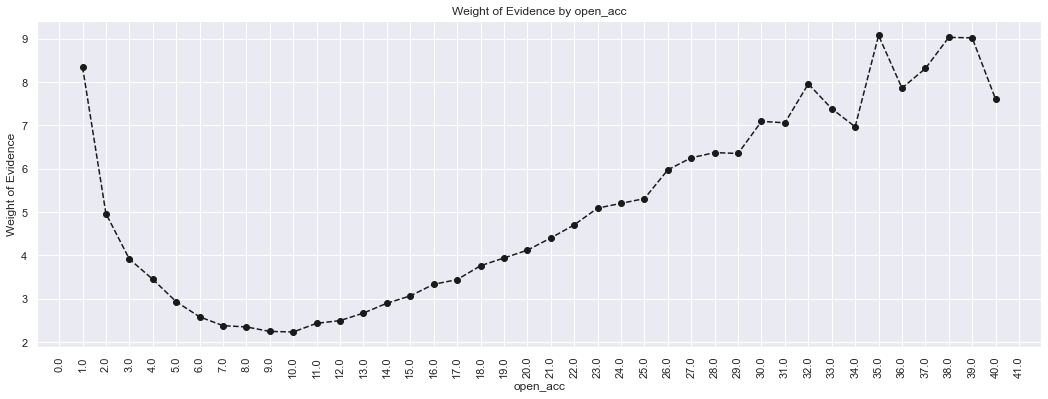

In [207]:
plot_by_woe(df_temp, 90)

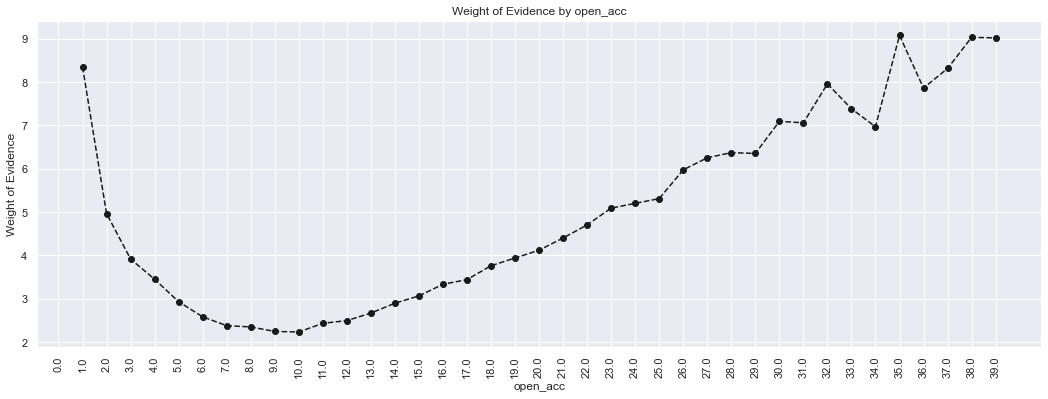

In [208]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [209]:
# Fine classing for 'open_acc'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [210]:
# Examining 'pub_rec'
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.901412    0.867742  72945.0  7978.0     0.866022   
1       1.0  10670   0.914902    0.114415   9762.0   908.0     0.115897   
2       2.0   1097   0.917046    0.011763   1006.0    91.0     0.011943   
3       3.0    331   0.924471    0.003549    306.0    25.0     0.003633   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001140   
5       5.0     73   0.917808    0.000783     67.0     6.0     0.000795   
6       6.0     19   1.000000    0.000204     19.0     0.0     0.000226   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000131   
8       8.0      5   1.000000    0.000054      5.0     0.0     0.000059   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000059   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.883793  0.019740             NaN       NaN  inf  
1     0.100587  2.207792        0.013489  2.188052  inf  
2     0.010081  4.510519        0.002145  2.302727  inf  
3     0.002769  5.810566        0.007425  1.300048  inf  
4     0.001772  6.181236        0.067328  0.370670  inf  
5     0.000665  7.230449        0.060665  1.049213  inf  
6     0.000000       inf        0.082192       inf  inf  
7     0.000332  7.768201        0.214286       inf  inf  
8     0.000000       inf        0.214286       inf  inf  
9     0.000000       inf        0.000000       NaN  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

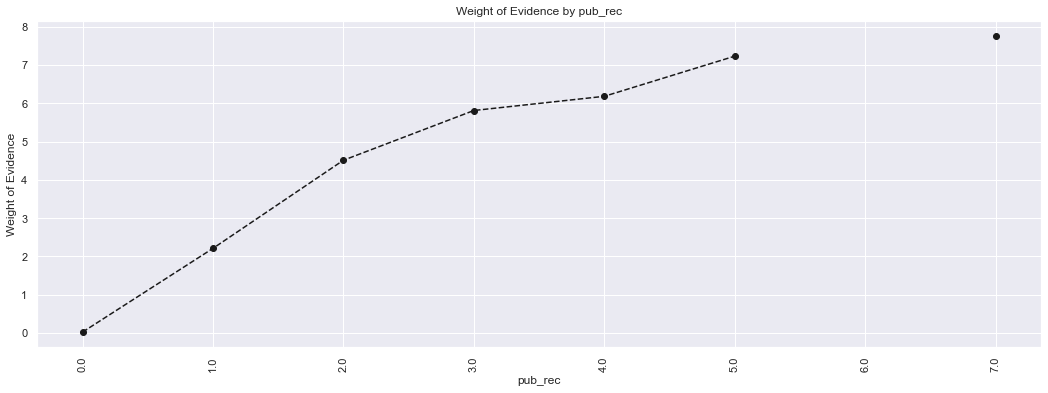

In [211]:
plot_by_woe(df_temp, 90)

In [212]:
# Fine classsing for 'pub_rec'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [213]:
# Examine 'total_acc_factor'
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.784000    0.001340     98.0    27.0   
1       (3.12, 6.24]   1499   0.865911    0.016074   1298.0   201.0   
2       (6.24, 9.36]   3715   0.884522    0.039836   3286.0   429.0   
3      (9.36, 12.48]   6288   0.889313    0.067427   5592.0   696.0   
4      (12.48, 15.6]   8289   0.900832    0.088883   7467.0   822.0   
5      (15.6, 18.72]   9843   0.901351    0.105547   8872.0   971.0   
6     (18.72, 21.84]  10270   0.904869    0.110126   9293.0   977.0   
7     (21.84, 24.96]   9971   0.905827    0.106920   9032.0   939.0   
8     (24.96, 28.08]  11873   0.904995    0.127315  10745.0  1128.0   
9      (28.08, 31.2]   7289   0.904925    0.078160   6596.0   693.0   
10     (31.2, 34.32]   6151   0.913022    0.065958   5616.0   535.0   
11    (34.32, 37.44]   4745   0.916333    0.050881   4348.0   397.0   
12    (37.44, 40.56]   3615   0.912033    0.038764   3297.0   318.0   
13    (40.56, 43.68]   2883   0.904613    0.030915   2608.0   275.0   
14     (43.68, 46.8]   1938   0.901445    0.020781   1747.0   191.0   
15     (46.8, 49.92]   1478   0.922192    0.015849   1363.0   115.0   
16    (49.92, 53.04]   1309   0.912147    0.014036   1194.0   115.0   
17    (53.04, 56.16]    640   0.920312    0.006863    589.0    51.0   
18    (56.16, 59.28]    428   0.885514    0.004589    379.0    49.0   
19     (59.28, 62.4]    386   0.891192    0.004139    344.0    42.0   
20     (62.4, 65.52]    322   0.866460    0.003453    279.0    43.0   
21    (65.52, 68.64]     57   0.982456    0.000611     56.0     1.0   
22    (68.64, 71.76]     43   0.930233    0.000461     40.0     3.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001163    0.002991  5.568792             NaN       NaN  inf  
1      0.015410    0.022267  3.660697        0.081911  1.908095  inf  
2      0.039012    0.047524  2.923811        0.018612  0.736886  inf  
3      0.066390    0.077102  2.445320        0.004791  0.478491  inf  
4      0.088650    0.091060

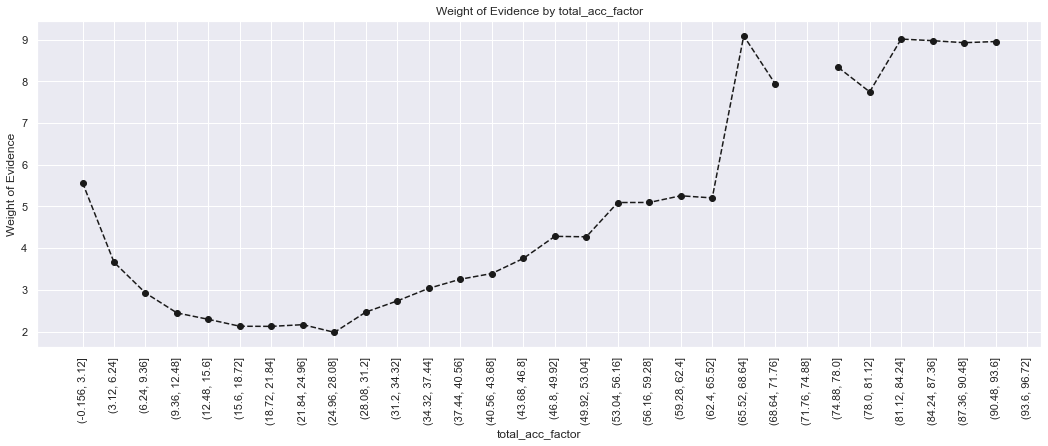

In [214]:
plot_by_woe(df_temp, 90)

In [215]:
# Fine classing for 'total_acc_factor'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

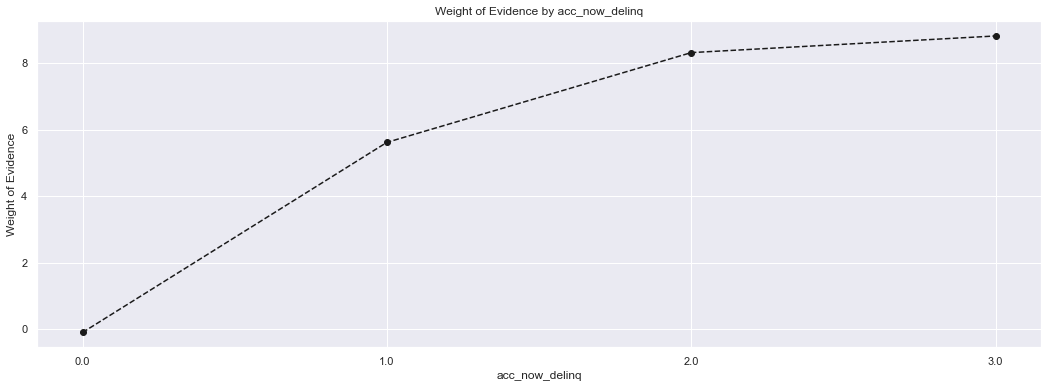

In [216]:
# Examining 'acc_now_delinq'
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp
plot_by_woe(df_temp)

In [217]:
# Fine classing for 'acc_now_delinq'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [218]:
# Preprocessing for 'total_rev_hi_lim_factor'
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.844538    0.002552   201.0   37.0   
1           (1006.566, 2013.133]    678   0.831858    0.007270   564.0  114.0   
2             (2013.133, 3019.7]   1121   0.859054    0.012021   963.0  158.0   
3             (3019.7, 4026.266]   1461   0.889117    0.015666  1299.0  162.0   
4           (4026.266, 5032.832]   2163   0.882571    0.023194  1909.0  254.0   
5           (5032.832, 6039.399]   2411   0.888843    0.025853  2143.0  268.0   
6           (6039.399, 7045.966]   2376   0.883838    0.025478  2100.0  276.0   
7           (7045.966, 8052.532]   2825   0.885664    0.030293  2502.0  323.0   
8           (8052.532, 9059.098]   2686   0.888310    0.028802  2386.0  300.0   
9          (9059.098, 10065.665]   3514   0.880478    0.037681  3094.0  420.0   
10        (10065.665, 11072.232]   2599   0.898807    0.027869  2336.0  263.0   
11        (11072.232, 12078.798]   3226   0.887167    0.034593  2862.0  364.0   
12        (12078.798, 13085.364]   2673   0.887392    0.028663  2372.0  301.0   
13        (13085.364, 14091.931]   2702   0.899334    0.028974  2430.0  272.0   
14        (14091.931, 15098.498]   3151   0.894319    0.033788  2818.0  333.0   
15        (15098.498, 16105.064]   2999   0.886962    0.032158  2660.0  339.0   
16         (16105.064, 17111.63]   2401   0.903374    0.025746  2169.0  232.0   
17         (17111.63, 18118.197]   2545   0.894303    0.027290  2276.0  269.0   
18        (18118.197, 19124.764]   2282   0.894391    0.024470  2041.0  241.0   
19         (19124.764, 20131.33]   2717   0.889216    0.029135  2416.0  301.0   
20         (20131.33, 21137.896]   2167   0.903553    0.023237  1958.0  209.0   
21        (21137.896, 22144.463]   1999   0.905453    0.021435  1810.0  189.0   
22         (22144.463, 23151.03]   1903   0.910142    0.020406  1732.0  171.0   
23         (23151.03, 24157.596]   1963   0.904738    0.021049  1776.0  187.0   
24        (24157.596, 25164.163]   2075   0.901687    0.022250  1871.0  204.0   
25        (25164.163, 26170.729]   1656   0.913647    0.017757  1513.0  143.0   
26        (26170.729, 27177.296]   1561   0.900064    0.016739  1405.0  156.0   
27        (27177.296, 28183.862]   1617   0.905380    0.017339  1464.0  153.0   
28        (28183.862, 29190.428]   1483   0.921106    0.015902  1366.0  117.0   
29        (29190.428, 30196.995]   1486   0.903096    0.015934  1342.0  144.0   
30        (30196.995, 31203.562]   1428   0.915266    0.015313  1307.0  121.0   
31        (31203.562, 32210.128]   1224   0.919118    0.013125  1125.0   99.0   
32        (32210.128, 33216.694]   1177   0.912489    0.012621  1074.0  103.0   
33        (33216.694, 34223.261]   1147   0.908457    0.012299  1042.0  105.0   
34        (34223.261, 35229.828]   1286   0.895801    0.013790  1152.0  134.0   
35        (35229.828, 36236.394]   1000   0.905000    0.010723   905.0   95.0   
36         (36236.394, 37242.96]    934   0.910064    0.010015   850.0   84.0   
37         (37242.96, 38249.527]    902   0.896896    0.009672   809.0   93.0   
38        (38249.527, 39256.094]    891   0.914703    0.009554   815.0   76.0   
39         (39256.094, 40262.66]    828   0.922705    0.008879   764.0   64.0   
40         (40262.66, 41269.227]    797   0.915935    0.008546   730.0   67.0   
41        (41269.227, 42275.793]    729   0.935528    0.007817   682.0   47.0   
42         (42275.793, 43282.36]    716   0.917598    0.007678   657.0   59.0   
43         (43282.36, 44288.926]    755   0.924503    0.008096   698.0   57.0   
44        (44288.926, 45295.492]    647   0.928903    0.006938   601.0   46.0   
45        (45295.492, 46302.059]    660   0.933333    0.007077   616.0   44.0   
46        (46302.059, 47308.626]    550   0.949091    0.005898   522.0   28.0   
47        (47308.626, 48315.192]    592   0.940878    0.006348   557.0   35.0   
48        (48315.192, 49321.758]    522 

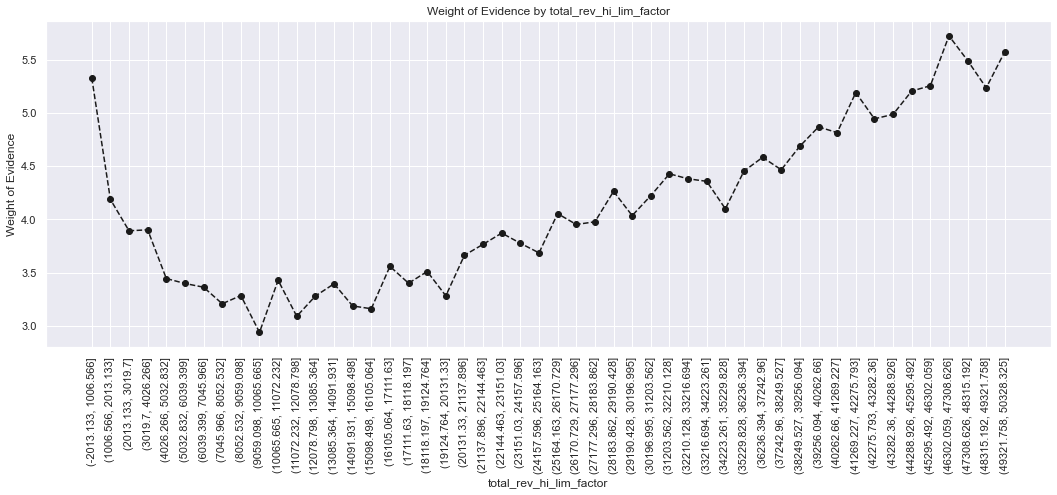

In [219]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [220]:
# Fine classing for 'total_rev_hi_lim_factor'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

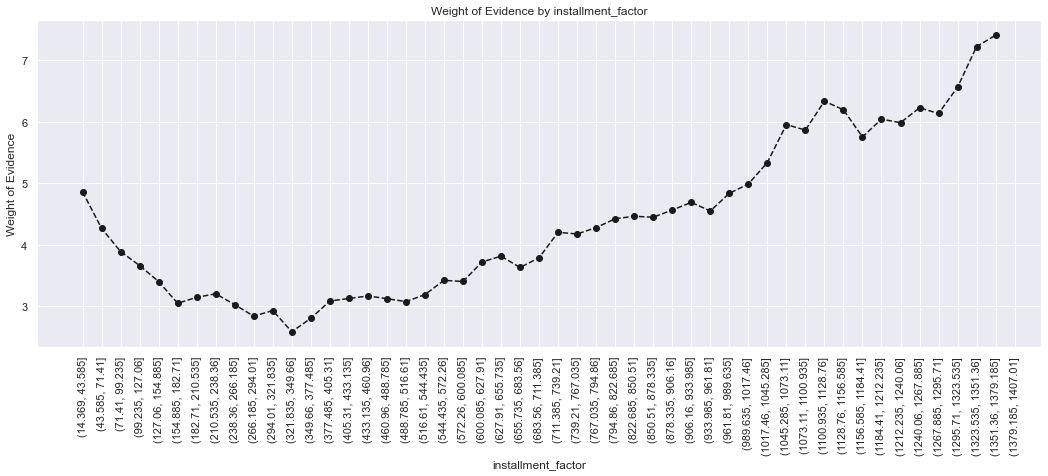

In [221]:
# Preprocessing 'installment_factor'
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [222]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.901584    0.956529  80424.0  8779.0   
1     (154704.0, 304608.0]   3626   0.937672    0.038882   3400.0   226.0   
2     (304608.0, 454512.0]    282   0.936170    0.003024    264.0    18.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   1.000000    0.000247     23.0     0.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   1.000000    0.000021      2.0     0.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.9

In [223]:
# Preprocessing the 'annual_inc_factor'
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.891155    0.671488  55805.0  6816.0   
1      (79752.0, 154704.0]  26582   0.926153    0.285040  24619.0  1963.0   
2     (154704.0, 229656.0]   2916   0.936214    0.031268   2730.0   186.0   
3     (229656.0, 304608.0]    710   0.943662    0.007613    670.0    40.0   
4     (304608.0, 379560.0]    171   0.935673    0.001834    160.0    11.0   
5     (379560.0, 454512.0]    111   0.936937    0.001190    104.0     7.0   
6     (454512.0, 529464.0]     53   0.962264    0.000568     51.0     2.0   
7     (529464.0, 604416.0]     33   0.969697    0.000354     32.0     1.0   
8     (604416.0, 679368.0]     10   1.000000    0.000107     10.0     0.0   
9     (679368.0, 754320.0]     13   1.000000    0.000139     13.0     0.0   
10    (754320.0, 829272.0]      5   1.000000    0.000054      5.0     0.0   
11    (829272.0, 904224.0]     13   0.923077    0.000139     12.0     1.0   
12    (904224.0, 979176.0]      3   1.000000    0.000032      3.0     0.0   
13   (979176.0, 1054128.0]      4   1.000000    0.000043      4.0     0.0   
14  (1054128.0, 1129080.0]      3   1.000000    0.000032      3.0     0.0   
15  (1129080.0, 1204032.0]      3   1.000000    0.000032      3.0     0.0   
16  (1204032.0, 1278984.0]      2   1.000000    0.000021      2.0     0.0   
17  (1278984.0, 1353936.0]      0        NaN    0.000000      NaN     NaN   
18  (1353936.0, 1428888.0]      0        NaN    0.000000      NaN     NaN   
19  (1428888.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
20  (1503840.0, 1578792.0]      0        NaN    0.000000      NaN     NaN   
21  (1578792.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN    0.000000      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN    0.000000      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN    0.000000      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN    0.000000      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN    0.000000      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN    0.000000      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN    0.000000      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN    0.000000      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN    0.000000      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN    0.000000      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN    0.000000      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN    0.000000      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN    0.000000      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN    0.000000      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN    0.000000      NaN     NaN   
51  (

In [224]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140_000, :]

In [225]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.773810    0.000958    65.0   19.0   
2     (10208.0, 12912.0]    123   0.813008    0.001403   100.0   23.0   
3     (12912.0, 15616.0]    304   0.868421    0.003467   264.0   40.0   
4     (15616.0, 18320.0]    383   0.832898    0.004368   319.0   64.0   
5     (18320.0, 21024.0]    733   0.856753    0.008359   628.0  105.0   
6     (21024.0, 23728.0]    704   0.867898    0.008028   611.0   93.0   
7     (23728.0, 26432.0]   1785   0.871709    0.020356  1556.0  229.0   
8     (26432.0, 29136.0]   1355   0.866421    0.015452  1174.0  181.0   
9     (29136.0, 31840.0]   2292   0.864747    0.026137  1982.0  310.0   
10    (31840.0, 34544.0]   2130   0.872300    0.024290  1858.0  272.0   
11    (34544.0, 37248.0]   3525   0.872624    0.040198  3076.0  449.0   
12    (37248.0, 39952.0]   1926   0.894081    0.021963  1722.0  204.0   
13    (39952.0, 42656.0]   4973   0.881158    0.056710  4382.0  591.0   
14    (42656.0, 45360.0]   4038   0.890045    0.046048  3594.0  444.0   
15    (45360.0, 48064.0]   3015   0.892869    0.034382  2692.0  323.0   
16    (48064.0, 50768.0]   4397   0.891744    0.050142  3921.0  476.0   
17    (50768.0, 53472.0]   2898   0.895100    0.033048  2594.0  304.0   
18    (53472.0, 56176.0]   4143   0.885832    0.047245  3670.0  473.0   
19    (56176.0, 58880.0]   1810   0.892818    0.020641  1616.0  194.0   
20    (58880.0, 61584.0]   4726   0.894625    0.053894  4228.0  498.0   
21    (61584.0, 64288.0]   2246   0.907836    0.025613  2039.0  207.0   
22    (64288.0, 66992.0]   3455   0.907381    0.039400  3135.0  320.0   
23    (66992.0, 69696.0]   1965   0.923155    0.022408  1814.0  151.0   
24    (69696.0, 72400.0]   4096   0.910645    0.046709  3730.0  366.0   
25    (72400.0, 75104.0]   3495   0.911874    0.039856  3187.0  308.0   
26    (75104.0, 77808.0]    967   0.928645    0.011027   898.0   69.0   
27    (77808.0, 80512.0]   3571   0.909829    0.040723  3249.0  322.0   
28    (80512.0, 83216.0]   1319   0.933283    0.015041  1231.0   88.0   
29    (83216.0, 85920.0]   2274   0.908091    0.025932  2065.0  209.0   
30    (85920.0, 88624.0]   1144   0.914336    0.013046  1046.0   98.0   
31    (88624.0, 91328.0]   2425   0.936907    0.027654  2272.0  153.0   
32    (91328.0, 94032.0]   1141   0.918493    0.013012  1048.0   93.0   
33    (94032.0, 96736.0]   1562   0.925096    0.017813  1445.0  117.0   
34    (96736.0, 99440.0]    916   0.923581    0.010446   846.0   70.0   
35   (99440.0, 102144.0]   2307   0.919809    0.026308  2122.0  185.0   
36  (102144.0, 104848.0]    552   0.923913    0.006295   510.0   42.0   
37  (104848.0, 107552.0]   1094   0.943327    0.012476  1032.0   62.0   
38  (107552.0, 110256.0]   1562   0.925096    0.017813  1445.0  117.0   
39  (110256.0, 112960.0]    295   0.922034    0.003364   272.0   23.0   
40  (112960.0, 115664.0]    790   0.926582    0.009009   732.0   58.0   
41  (115664.0, 118368.0]    358   0.946927    0.004083   339.0   19.0   
42  (118368.0, 121072.0]   1473   0.929396    0.016798  1369.0  104.0   
43  (121072.0, 123776.0]    204   0.946078    0.002326   193.0   11.0   
44  (123776.0, 126480.0]    870   0.939080    0.009921   817.0   53.0   
45  (126480.0, 129184.0]    239   0.958159    0.002725   229.0   10.0   
46  (129184.0, 131888.0]    734   0.935967    0.008370   687.0   47.0   
47  (131888.0, 134592.0]    207   0.942029    0.002361   195.0   12.0   
48  (134592.0, 137296.0]    449   0.933185    0.005120   419.0   30.0   
49  (137296.0, 140000.0]    627   0.923445    0.007150   579.0   48.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000127    0.000000       inf             NaN       NaN  inf  
1      0.000823    0.002188  5.868369        0.226190       inf  inf  
2      0.001266    0.002649  5.726729        0.039199  0.141640  inf  

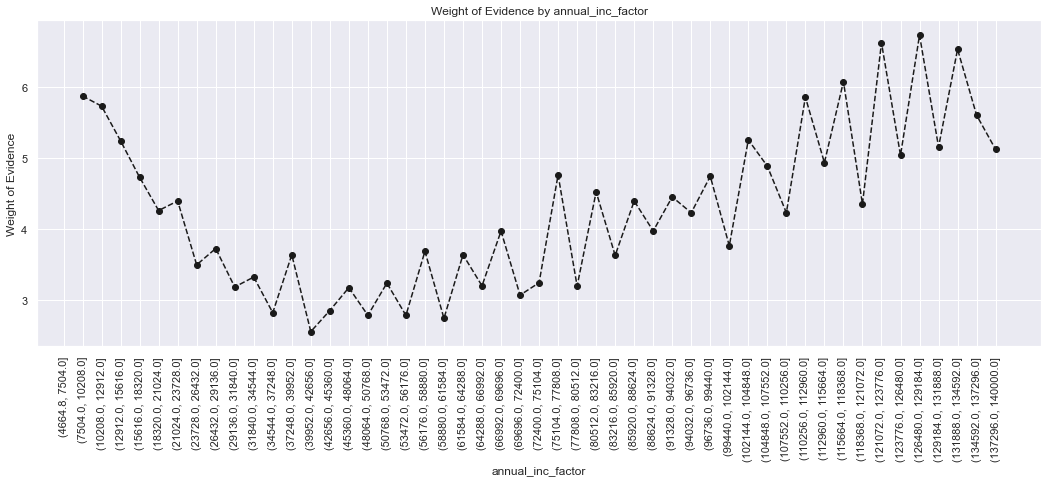

In [226]:
# Plot the WOE
plot_by_woe(df_temp, 90)

In [227]:
# Fine classing the 'annual_inc_factor'
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100_000), 1, 0)
df_inputs_prepr['annual_inc:100K-110K'] = np.where((df_inputs_prepr['annual_inc'] > 100_000) & (df_inputs_prepr['annual_inc'] <= 110_000), 1, 0)
df_inputs_prepr['annual_inc:110K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 110000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-130K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 130000), 1, 0)
df_inputs_prepr['annual_inc:<140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [228]:
# mths_since_last_
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.890208    0.031283  1200.0  148.0   
1                     (3.4, 6.8]   1890   0.898942    0.043861  1699.0  191.0   
2                    (6.8, 10.2]   3373   0.903647    0.078276  3048.0  325.0   
3                   (10.2, 13.6]   2496   0.909455    0.057924  2270.0  226.0   
4                   (13.6, 17.0]   3165   0.903949    0.073449  2861.0  304.0   
5                   (17.0, 20.4]   2282   0.904470    0.052958  2064.0  218.0   
6                   (20.4, 23.8]   2115   0.909693    0.049082  1924.0  191.0   
7                   (23.8, 27.2]   2755   0.905626    0.063934  2495.0  260.0   
8                   (27.2, 30.6]   1929   0.906169    0.044766  1748.0  181.0   
9                   (30.6, 34.0]   2453   0.907460    0.056926  2226.0  227.0   
10                  (34.0, 37.4]   1786   0.916013    0.041447  1636.0  150.0   
11                  (37.4, 40.8]   1765   0.906516    0.040960  1600.0  165.0   
12                  (40.8, 44.2]   2270   0.887665    0.052679  2015.0  255.0   
13                  (44.2, 47.6]   1664   0.910457    0.038616  1515.0  149.0   
14                  (47.6, 51.0]   1739   0.898792    0.040356  1563.0  176.0   
15                  (51.0, 54.4]   1158   0.896373    0.026873  1038.0  120.0   
16                  (54.4, 57.8]   1130   0.921239    0.026224  1041.0   89.0   
17                  (57.8, 61.2]   1423   0.910049    0.033023  1295.0  128.0   
18                  (61.2, 64.6]   1015   0.903448    0.023555   917.0   98.0   
19                  (64.6, 68.0]   1342   0.904620    0.031143  1214.0  128.0   
20                  (68.0, 71.4]    930   0.898925    0.021582   836.0   94.0   
21                  (71.4, 74.8]    928   0.903017    0.021536   838.0   90.0   
22                  (74.8, 78.2]   1195   0.917992    0.027732  1097.0   98.0   
23                  (78.2, 81.6]    768   0.891927    0.017823   685.0   83.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

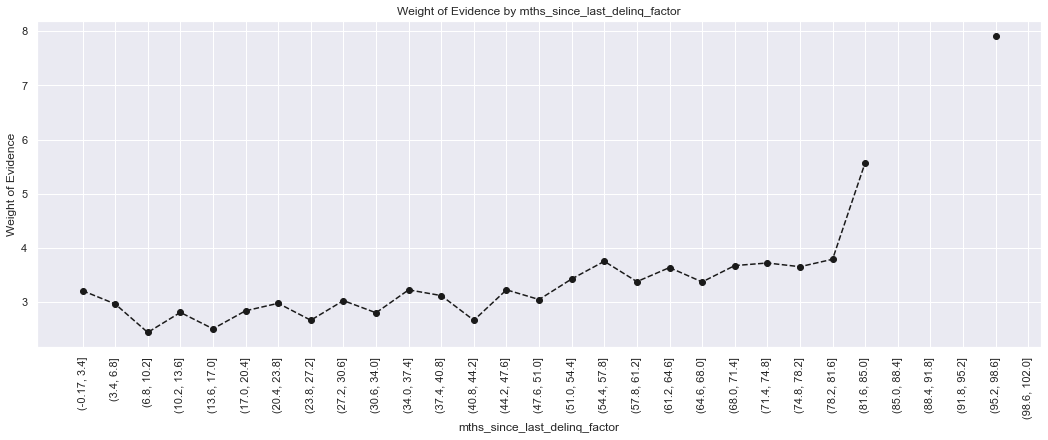

In [229]:
plot_by_woe(df_temp, 90)

In [230]:
# Fine Classing for the missing values of 'mths_since_last_delinq'
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] >= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] >= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] >= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [231]:
# Preprocessing of dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    187   0.903743    0.002005   169.0   18.0   
1         (0.4, 0.8]    184   0.885870    0.001973   163.0   21.0   
2         (0.8, 1.2]    223   0.905830    0.002391   202.0   21.0   
3         (1.2, 1.6]    255   0.913725    0.002734   233.0   22.0   
4         (1.6, 2.0]    315   0.901587    0.003378   284.0   31.0   
5       (2.0, 2.399]    324   0.916667    0.003474   297.0   27.0   
6     (2.399, 2.799]    366   0.920765    0.003925   337.0   29.0   
7     (2.799, 3.199]    442   0.911765    0.004740   403.0   39.0   
8     (3.199, 3.599]    484   0.944215    0.005190   457.0   27.0   
9     (3.599, 3.999]    563   0.904085    0.006037   509.0   54.0   
10    (3.999, 4.399]    599   0.926544    0.006423   555.0   44.0   
11    (4.399, 4.799]    661   0.915280    0.007088   605.0   56.0   
12    (4.799, 5.199]    706   0.926346    0.007570   654.0   52.0   
13    (5.199, 5.599]    821   0.919610    0.008804   755.0   66.0   
14    (5.599, 5.999]    841   0.915577    0.009018   770.0   71.0   
15    (5.999, 6.398]    889   0.922385    0.009533   820.0   69.0   
16    (6.398, 6.798]    978   0.943763    0.010487   923.0   55.0   
17    (6.798, 7.198]   1021   0.918707    0.010948   938.0   83.0   
18    (7.198, 7.598]   1057   0.914853    0.011334   967.0   90.0   
19    (7.598, 7.998]   1170   0.927350    0.012546  1085.0   85.0   
20    (7.998, 8.398]   1172   0.918942    0.012567  1077.0   95.0   
21    (8.398, 8.798]   1127   0.921029    0.012085  1038.0   89.0   
22    (8.798, 9.198]   1281   0.927400    0.013736  1188.0   93.0   
23    (9.198, 9.598]   1309   0.909091    0.014036  1190.0  119.0   
24    (9.598, 9.998]   1371   0.919037    0.014701  1260.0  111.0   
25   (9.998, 10.397]   1429   0.923023    0.015323  1319.0  110.0   
26  (10.397, 10.797]   1521   0.911243    0.016310  1386.0  135.0   
27  (10.797, 11.197]   1555   0.920900    0.016674  1432.0  123.0   
28  (11.197, 11.597]   1597   0.909831    0.017125  1453.0  144.0   
29  (11.597, 11.997]   1554   0.917632    0.016664  1426.0  128.0   
30  (11.997, 12.397]   1607   0.907281    0.017232  1458.0  149.0   
31  (12.397, 12.797]   1719   0.920884    0.018433  1583.0  136.0   
32  (12.797, 13.197]   1614   0.926270    0.017307  1495.0  119.0   
33  (13.197, 13.597]   1717   0.913803    0.018411  1569.0  148.0   
34  (13.597, 13.997]   1707   0.899824    0.018304  1536.0  171.0   
35  (13.997, 14.396]   1724   0.911253    0.018487  1571.0  153.0   
36  (14.396, 14.796]   1773   0.906937    0.019012  1608.0  165.0   
37  (14.796, 15.196]   1755   0.905413    0.018819  1589.0  166.0   
38  (15.196, 15.596]   1695   0.909145    0.018176  1541.0  154.0   
39  (15.596, 15.996]   1752   0.916667    0.018787  1606.0  146.0   
40  (15.996, 16.396]   1653   0.909861    0.017725  1504.0  149.0   
41  (16.396, 16.796]   1689   0.908822    0.018111  1535.0  154.0   
42  (16.796, 17.196]   1770   0.909605    0.018980  1610.0  160.0   
43  (17.196, 17.596]   1708   0.894028    0.018315  1527.0  181.0   
44  (17.596, 17.996]   1680   0.908929    0.018015  1527.0  153.0   
45  (17.996, 18.395]   1671   0.910233    0.017918  1521.0  150.0   
46  (18.395, 18.795]   1638   0.910867    0.017564  1492.0  146.0   
47  (18.795, 19.195]   1628   0.896192    0.017457  1459.0  169.0   
48  (19.195, 19.595]   1606   0.902242    0.017221  1449.0  157.0   
49  (19.595, 19.995]   1603   0.891454    0.017189  1429.0  174.0   
50  (19.995, 20.395]   1512   0.901455    0.016213  1363.0  149.0   
51  (20.395, 20.795]   1656   0.892512    0.017757  1478.0  178.0   
52  (20.795, 21.195]   1505   0.899668    0.016138  1354.0  151.0   
53  (21.195, 21.595]   1455   0.892096    0.015602  1298.0  157.0   
54  (21.595, 21.995]   1452   0.894628    0.015570  1299.0  153.0   
55  (21.995, 22.394]   1394   0.882353    0.014948  1230.0  164.0   
56  (22.394, 22.794]   1309   0.872422    0.014036  1142.0  167.0   
57  (22.

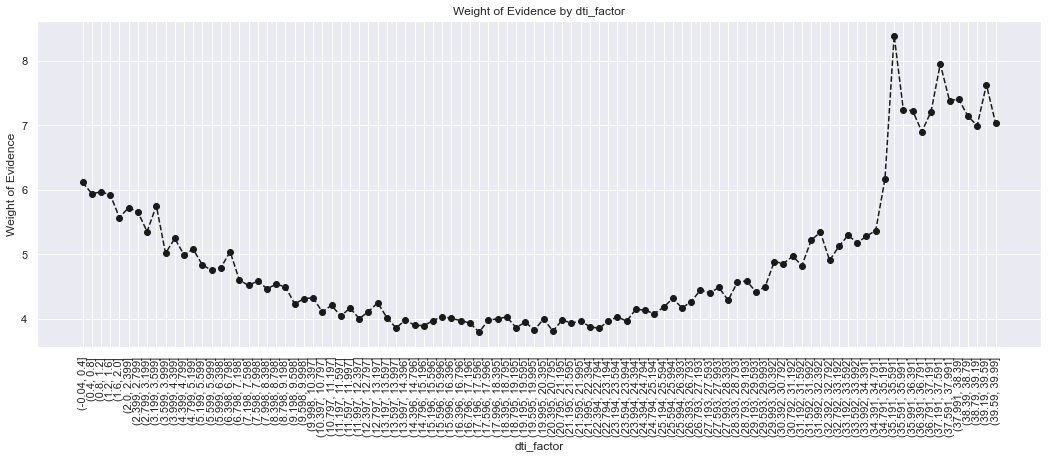

In [232]:
# Visualizing by WOE
plot_by_woe(df_temp, 90)

In [233]:
# Fine classing the dti 
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [234]:
# Preprocessing the 'mths_since_last_record'
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.944444    0.002864    34.0    2.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.924242    0.005250    61.0    5.0   
4                  (10.32, 12.9]     42   0.904762    0.003341    38.0    4.0   
5                  (12.9, 15.48]     69   0.898551    0.005489    62.0    7.0   
6                 (15.48, 18.06]     95   0.873684    0.007557    83.0   12.0   
7                 (18.06, 20.64]     58   0.982759    0.004614    57.0    1.0   
8                 (20.64, 23.22]    101   0.900990    0.008034    91.0   10.0   
9                  (23.22, 25.8]     94   0.968085    0.007478    91.0    3.0   
10                 (25.8, 28.38]    135   0.933333    0.010739   126.0    9.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.933673    0.015591   183.0   13.0   
13                (33.54, 36.12]    195   0.933333    0.015512   182.0   13.0   
14                 (36.12, 38.7]    166   0.927711    0.013205   154.0   12.0   
15                 (38.7, 41.28]    234   0.914530    0.018614   214.0   20.0   
16                (41.28, 43.86]    194   0.907216    0.015432   176.0   18.0   
17                (43.86, 46.44]    328   0.932927    0.026092   306.0   22.0   
18                (46.44, 49.02]    367   0.923706    0.029194   339.0   28.0   
19                 (49.02, 51.6]    231   0.956710    0.018376   221.0   10.0   
20                 (51.6, 54.18]    447   0.932886    0.035558   417.0   30.0   
21                (54.18, 56.76]    264   0.924242    0.021001   244.0   20.0   
22                (56.76, 59.34]    393   0.941476    0.031262   370.0   23.0   
23                (59.34, 61.92]    287   0.930314    0.022830   267.0   20.0   
24                 (61.92, 64.5]    405   0.938272    0.032217   380.0   25.0   
25                 (64.5, 67.08]    394   0.964467    0.031342   380.0   14.0   
26                (67.08, 69.66]    272   0.900735    0.021637   245.0   27.0   
27                (69.66, 72.24]    366   0.915301    0.029115   335.0   31.0   
28                (72.24, 74.82]    231   0.926407    0.018376   214.0   17.0   
29                 (74.82, 77.4]    350   0.934286    0.027842   327.0   23.0   
30                 (77.4, 79.98]    228   0.899123    0.018137   205.0   23.0   
31                (79.98, 82.56]    355   0.912676    0.028240   324.0   31.0   
32                (82.56, 85.14]    288   0.944444    0.022910   272.0   16.0   
33                (85.14, 87.72]    251   0.844622    0.019967   212.0   39.0   
34                 (87.72, 90.3]    345   0.895652    0.027444   309.0   36.0   
35                 (90.3, 92.88]    249   0.851406    0.019807   212.0   37.0   
36                (92.88, 95.46]    385   0.870130    0.030626   335.0   50.0   
37                (95.46, 98.04]    401   0.887781    0.031899   356.0   45.0   
38               (98.04, 100.62]    327   0.889908    0.026012   291.0   36.0   
39               (100.62, 103.2]    526   0.893536    0.041842   470.0   56.0   
40               (103.2, 105.78]    396   0.909091    0.031501   360.0   36.0   
41              (105.78, 108.36]    565   0.916814    0.044945   518.0   47.0   
42              (108.36, 110.94]    407   0.936118    0.032376   381.0   26.0   
43              (110.94, 113.52]    524   0.898855    0.041683   471.0   53.0   
44               (113.52, 116.1]    515   0.920388    0.040967   474.0   41.0   
45               (116.1, 118.68]    314   0.898089    0.024978   282.0   32.0   
46              (118.68, 121.26]     92   0.858696    0.007318    79.0   13.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

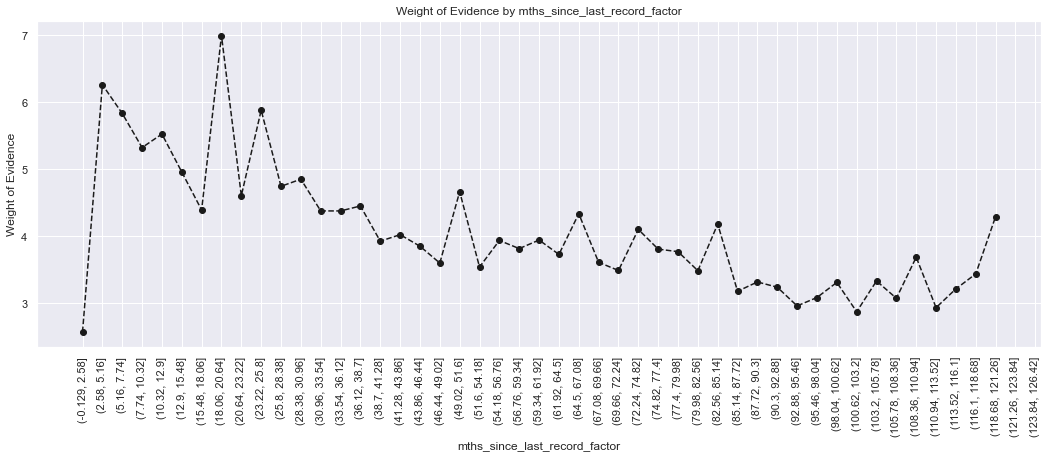

In [235]:
plot_by_woe(df_temp, 90)

In [236]:
# Fine classing the 'mths_since_last_record'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

### Preprocessing the Test Dataset

In [238]:
# loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [239]:
# Store files as csv and export them
loan_data_inputs_train.to_csv('./dataset/loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('./dataset/loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('./dataset/loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('./dataset/loan_data_targets_test.csv')